# Telecom Churn Prediction

**Author:** Sagar Maru (https://github.com/sagar-maru)

# 1. Introduction

## 1.1 Business Overview

The telecommunications industry operates in a highly competitive environment where customers have the freedom to choose from multiple service providers. This level of competition means that customers are not only able to switch between operators but do so frequently if their current provider fails to offer attractive deals, discounts, or service enhancements.

## 1.2 Problem Statement

In the telecom sector, customer churn is a significant concern, with many users switching operators if they are not presented with compelling offers or value propositions. Retaining existing customers has become a priority for telecom operators, as it is far more cost-effective to retain a customer than to acquire a new one. 

In this context, a critical challenge for telecom companies is minimizing churn, which can result from a range of factors, such as unsatisfactory service, lack of relevant offers, or price sensitivity. The industry typically experiences an annual churn rate of 15-25%, which highlights the urgent need for targeted retention strategies. 

It is estimated that acquiring a new customer can cost telecom companies 5-10 times more than retaining an existing one, underscoring the importance of customer retention. To achieve this, operators need to proactively predict which customers are at high risk of churning, enabling them to implement retention strategies before the customer makes the switch to a competitor.

Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.


## 1.3 Objective of the Project

The primary objective of this case study is to develop a machine learning (ML) model capable of predicting customer churn. The model will serve several key purposes:
- **Churn Prediction**: Predict whether high-value customers are likely to churn in the near future (i.e., during the churn phase). By identifying these customers, the telecom company can take preemptive actions, such as offering special plans, exclusive discounts, or personalized engagement, to prevent churn.
  
- **Identification of Churn Predictors**: Identify critical factors or variables that are strong indicators of churn. Understanding these variables will help operators pinpoint why customers choose to switch to other networks, providing valuable insights for improving customer satisfaction.

- **Strategic Recommendations**: Based on the insights gathered, the project will recommend strategies to effectively manage and reduce customer churn. These recommendations may involve personalized offerings, better customer service practices, or targeted marketing campaigns to increase customer retention.

- **Dimensionality Reduction**: To address the challenge of working with large datasets with many features, techniques such as Principal Component Analysis (PCA) will be employed to reduce the dimensionality of the data. This will streamline the process of building an effective and efficient predictive model.

- **Model Evaluation**: Even though the overall accuracy of the model will be a key performance metric, it is essential to also consider other evaluation metrics such as precision, recall, and F1 score. For instance, depending on business priorities, the model may be evaluated for its ability to identify customers who are most likely to churn with high accuracy, which may require optimizing recall to reduce false negatives. The model’s effectiveness will be assessed based on these metrics, ensuring alignment with business objectives.

## 1.4 Approach to Solve the Business Problem

The methodology for addressing this business challenge involves the following key steps:
- **Step 1**: **Introduction** – Establishing the business context, problem statement, and the project’s objectives.

- **Step 2**: **Data Understanding and Preparation** – Importing and preprocessing the data to ensure it is ready for analysis and modeling.

- **Step 3**: **Handling Missing Values & Data Splitting** – Addressing any missing or incomplete data through imputation, removal, or other appropriate techniques to ensure data quality and integrity for model training. After addressing missing data, the next step is to split the dataset into training and testing sets.

- **Step 4**: **Exploratory Data Analysis (EDA)** – Analyzing the data to uncover patterns, trends, and relationships between various features and churn behavior, providing insights that inform the model-building process.

- **Step 5**: **Feature Engineering and Selection** – Creating new features or modifying existing ones to enhance the model's predictive power. This includes selecting the most relevant features that contribute significantly to predicting churn, while also reducing noise and overfitting.

- **Step 6**: **Model Training, Prediction and Evaluation** – Building and training the machine learning model(s) using the prepared data, and fine-tuning hyperparameters to improve model performance. Predicting churn on both the training and test datasets and evaluating the model’s performance using appropriate metrics, such as accuracy, precision, recall, and F1 score.

- **Step 7**: **Recommendations** – Providing actionable insights and strategies based on the results of the predictive model to help reduce churn and improve customer retention.

- **Step 8: Creating the Submission File** – To create the submission file, ensure that the format matches exactly with the provided in sample file. The submission should include two columns: **id** and **churn_probability**.

---

# 2. Data Understanding and Data Preparation

## 2.1 Importing Libraries and Packages

To build an effective model, the first step involves importing necessary libraries and packages. This includes libraries for data manipulation (e.g., Pandas, NumPy), data visualization (e.g., Matplotlib, Seaborn), machine learning (e.g., Scikit-learn, XGBoost), and dimensionality reduction (e.g., PCA). Proper data preparation and cleaning are essential to ensure the model can accurately predict customer churn.


In [3]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno
from xgboost import XGBClassifier

#Sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, make_scorer, roc_auc_score, f1_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Setting
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2.2 Data Preprocessing

Data preprocessing is a crucial step in the pipeline. It involves handling missing data, normalizing numerical features, encoding categorical variables, and applying dimensionality reduction techniques (e.g., PCA) to ensure that the data is suitable for training machine learning models. Effective preprocessing can significantly improve model performance.
    

In [2]:
# #COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telecom-churn-case-study-hackathon-c-66/data_dictionary.csv
/kaggle/input/telecom-churn-case-study-hackathon-c-66/sample.csv
/kaggle/input/telecom-churn-case-study-hackathon-c-66/starter-notebook - Labs 1.ipynb
/kaggle/input/telecom-churn-case-study-hackathon-c-66/train.csv
/kaggle/input/telecom-churn-case-study-hackathon-c-66/test.csv


In [17]:
#filepath = "D:/Masters AI & ML/June Batch/Course 3 Machine Learning 2/Telecom Churn Case Study/"
#data = pd.read_csv(filepath+"train.csv")
#data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [19]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

#data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/train.csv")
#unseen = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/test.csv")
#sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/data_dictionary.csv")

filesdir = "D:/Masters AI & ML/June Batch/Course 3 Machine Learning 2/Telecom Churn Case Study/"
data = pd.read_csv(filesdir+"train.csv")
unseen = pd.read_csv(filesdir+"test.csv")
sample = pd.read_csv(filesdir+"sample.csv")
data_dict = pd.read_csv(filesdir+"data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [4]:
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [5]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

Let's look at each variable's datatype:

In [6]:
# Display detailed information about the DataFrame 'data', including column names, 
# data types, non-null counts, and memory usage.
# 'verbose=True' will show all columns (even if they have few non-null values).
# 'null_counts=True' will display the count of missing (null) values for each column.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

Let's also summarize the features using the df.describe method:

In [7]:
data.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

# 3. Handling Missing Values & Data Splitting
---
- **Handling Missing Data**: This step involves addressing any missing or incomplete data through appropriate methods such as imputation, removal, or other techniques. The goal is to ensure the integrity and quality of the dataset before model training, minimizing the impact of missing values on the predictive power of the model. Common strategies include replacing missing values with statistical measures (e.g., mean, median), using advanced imputation methods (e.g., iterative imputation), or eliminating rows/columns with excessive missing data when necessary.

- **Data Splitting**: After addressing missing data, the next step is to split the dataset into training and testing sets. This division ensures that the model can be trained on one subset of the data and evaluated on an independent subset, allowing for reliable performance assessment and mitigating the risk of overfitting.
---

## 3.1 Dropping Unnecessary Columns
   - The first step in handling missing data involves identifying and removing any columns that are not relevant to the predictive model or that have a high proportion of missing values (e.g., columns with over 80-90% missing data). These columns provide little to no value for the analysis and may introduce noise into the model, thus removing them helps to reduce dimensionality and improve computational efficiency.
   - Additionally, columns that have minimal variance or lack meaningful features for churn prediction, such as identifiers or timestamp columns, are also dropped.


<Axes: >

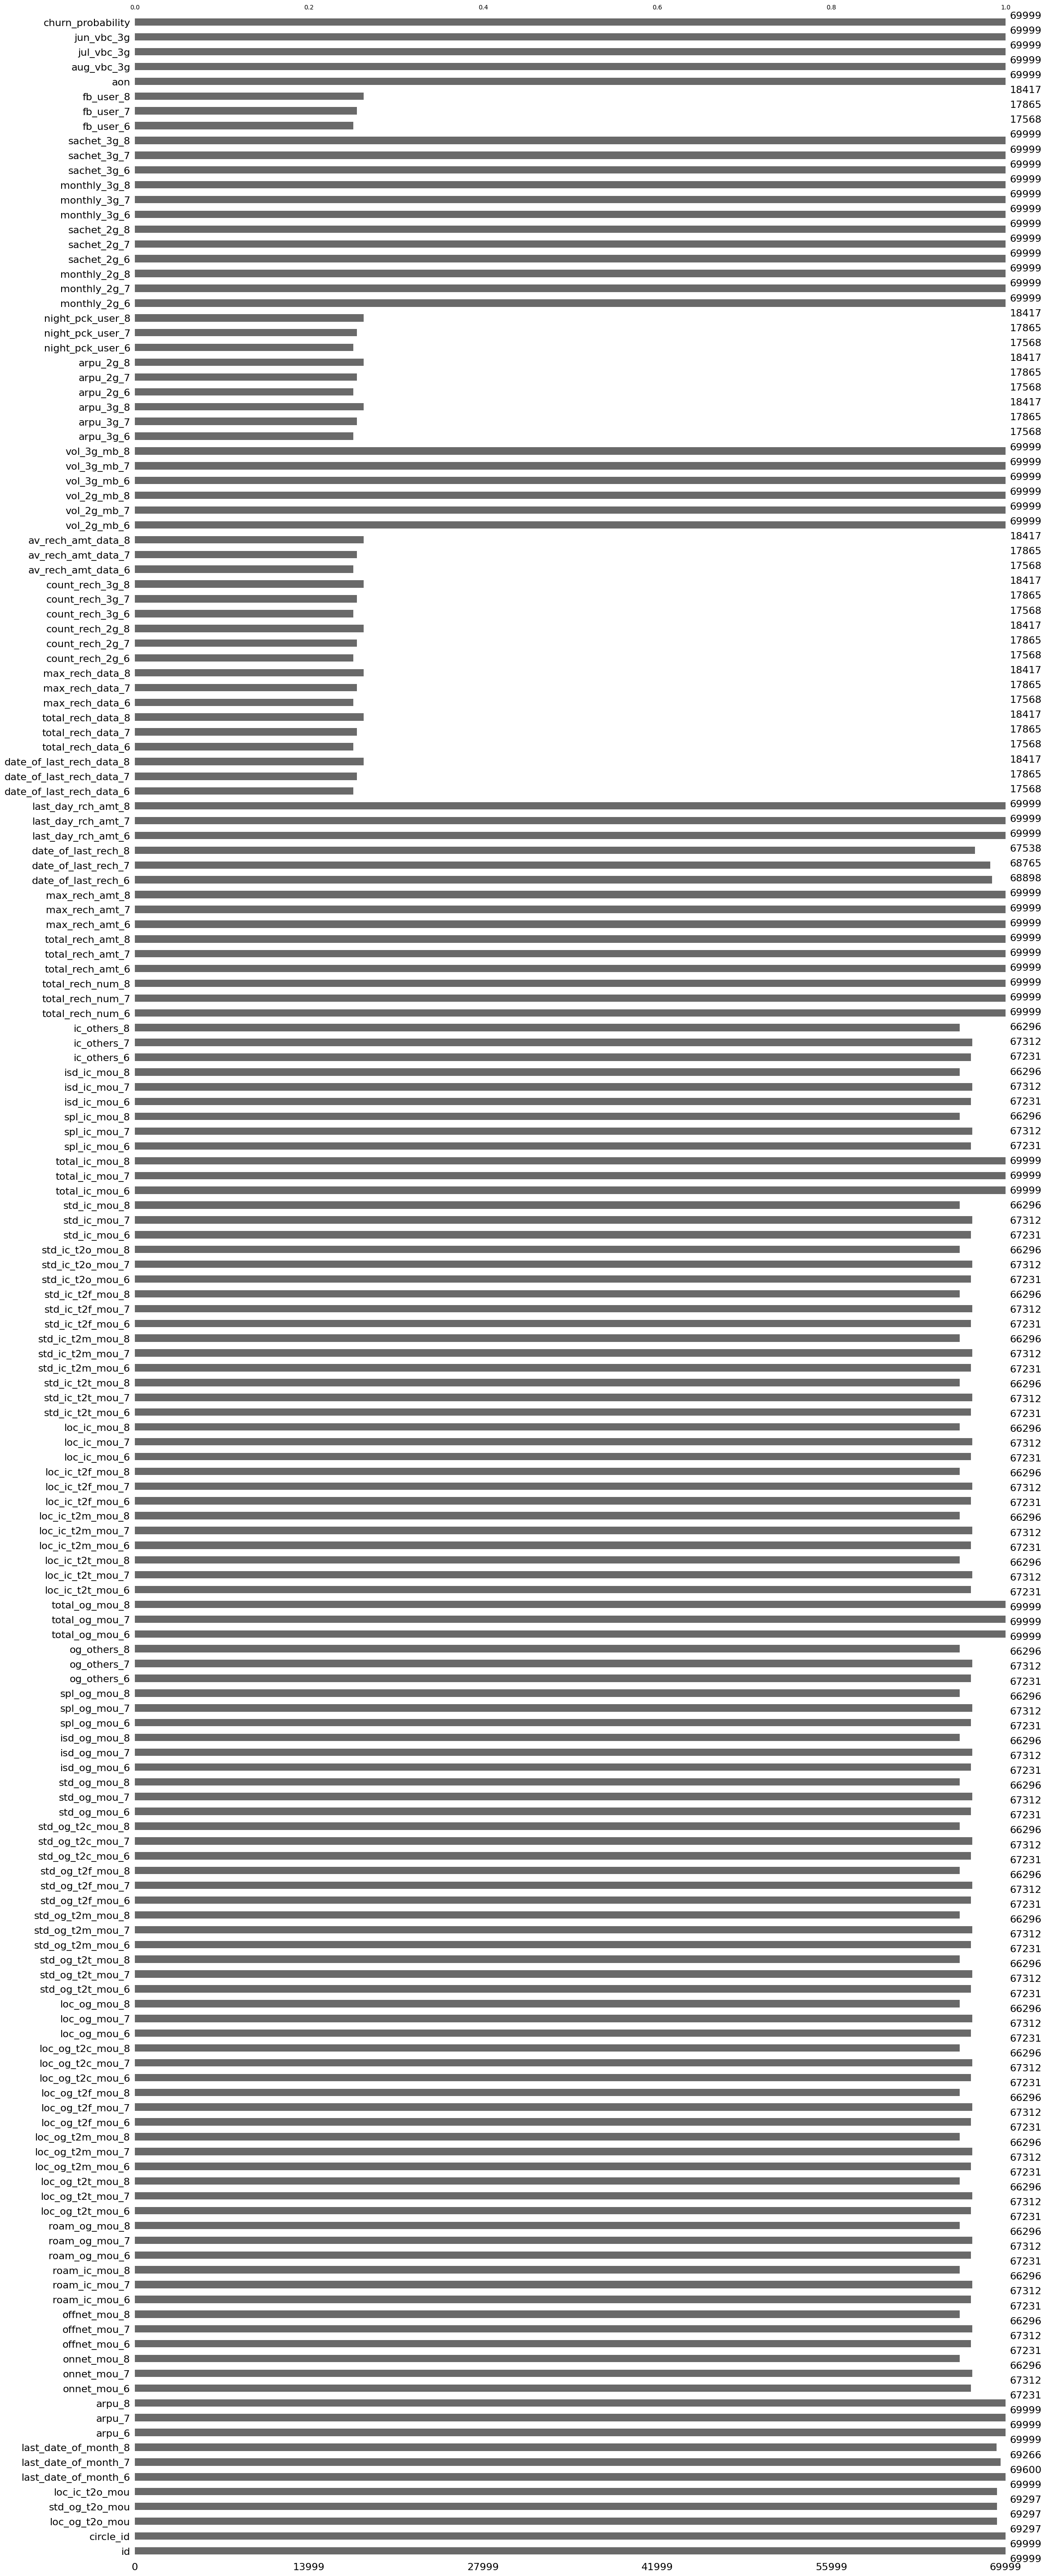

In [8]:
msno.bar(data)

<Axes: >

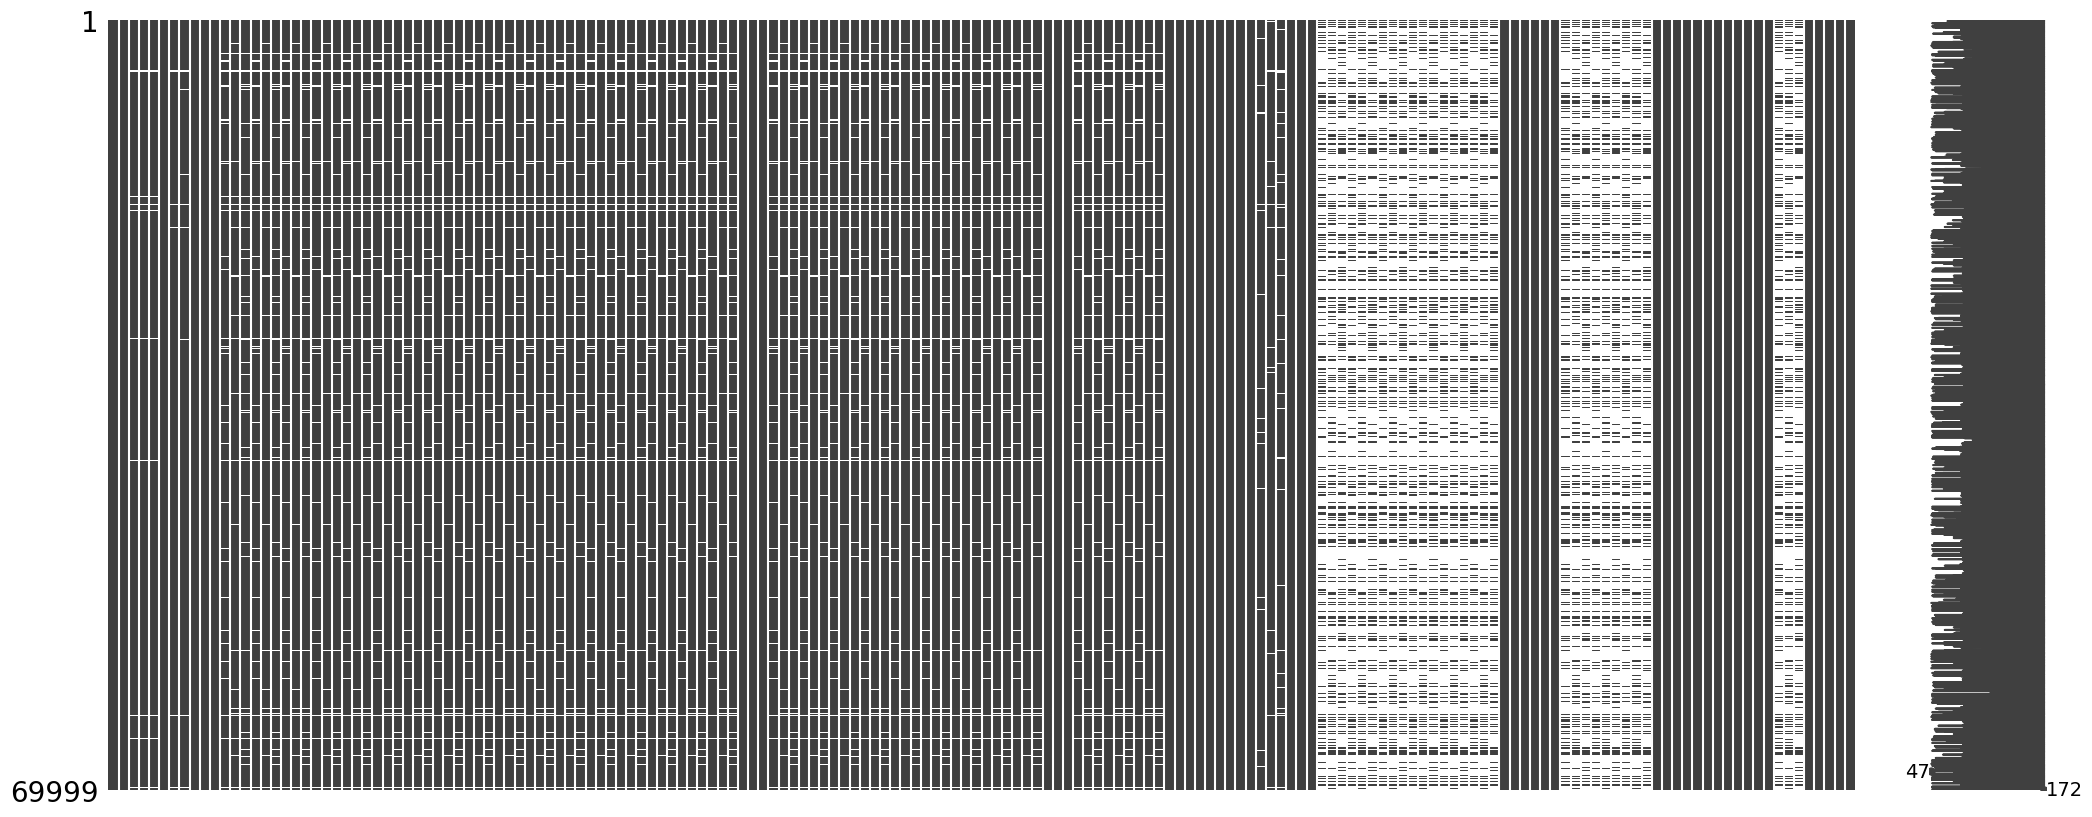

In [9]:
msno.matrix(data)

Lets create few functions to calculate the missing data for each column:

In [10]:
def calculate_missing_percentage(dataset):
    """
    This function calculates the percentage of missing values in the entire DataFrame.
    
    Parameters:
    dataset (pandas.DataFrame): The DataFrame for which the missing value percentage is to be calculated.
    """
        
    # Calculate the percentage of missing values in the entire DataFrame
    total_missing_values = dataset.isnull().sum().sum()  # Total number of missing values in the DataFrame
    total_cells = np.product(dataset.shape)  # Total number of cells in the DataFrame (rows * columns)

    # Calculate the percentage of missing values
    missing_percentage = (total_missing_values / total_cells) * 100

    # Display the percentage of missing values
    return total_missing_values, missing_percentage

def calculate_missing_data_summary(dataset):
    """
    This function generates a summary of missing data for each column in the provided DataFrame.
    
    Parameters:
    dataset (pandas.DataFrame): The DataFrame for which the missing data summary is to be generated.
    """
    
    # Calculate the total number of missing values per column in the DataFrame
    missing_values_count = dataset.isnull().sum().sort_values(ascending=False)

    # Calculate the percentage of missing values per column
    missing_values_percentage = (dataset.isnull().sum() / len(dataset) * 100).sort_values(ascending=False)

    # Combine the total and percentage of missing values into a single DataFrame
    missing_data_summary = pd.concat([missing_values_count, missing_values_percentage], axis=1, keys=['Total', 'Percent'])

    # Display the DataFrame showing the total and percentage of missing values
    return missing_data_summary

def calculate_missing_summary(dataset):

    # Checking the missing percentage for the train data set
    missing_values, missing_percentage = calculate_missing_percentage(dataset)
    print('-'*50)
    print(f"Total of missing values: {missing_values: }")
    print('-'*50)
    print(f"Percentage of missing values: {missing_percentage:.2f}%")
    print('-'*50)

    # Checking the missing data summary for the train data set
    missing_data_summary = calculate_missing_data_summary(dataset)
    print(missing_data_summary)


In [11]:
calculate_missing_summary(data)

--------------------------------------------------
Total of missing values:  1835086
--------------------------------------------------
Percentage of missing values: 15.24%
--------------------------------------------------
                          Total    Percent
arpu_3g_6                 52431  74.902499
count_rech_2g_6           52431  74.902499
night_pck_user_6          52431  74.902499
arpu_2g_6                 52431  74.902499
date_of_last_rech_data_6  52431  74.902499
total_rech_data_6         52431  74.902499
av_rech_amt_data_6        52431  74.902499
max_rech_data_6           52431  74.902499
count_rech_3g_6           52431  74.902499
fb_user_6                 52431  74.902499
night_pck_user_7          52134  74.478207
date_of_last_rech_data_7  52134  74.478207
total_rech_data_7         52134  74.478207
max_rech_data_7           52134  74.478207
fb_user_7                 52134  74.478207
count_rech_2g_7           52134  74.478207
count_rech_3g_7           52134  74.478207
ar

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [12]:
missing_values_percentage = calculate_missing_data_summary(data)

# Get the names of columns where the missing data percentage is greater than or equal to 40%
columns_to_drop = missing_values_percentage[missing_values_percentage['Percent'] >= 40.0].index.tolist()
print(columns_to_drop)

['arpu_3g_6', 'count_rech_2g_6', 'night_pck_user_6', 'arpu_2g_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'count_rech_3g_6', 'fb_user_6', 'night_pck_user_7', 'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'fb_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_8', 'night_pck_user_8', 'max_rech_data_8', 'total_rech_data_8', 'arpu_2g_8', 'arpu_3g_8', 'date_of_last_rech_data_8', 'fb_user_8', 'count_rech_3g_8']


In [13]:
# Drop the columns with more than 40% missing values from the DataFrame
data_filtered = data.drop(columns=columns_to_drop)

In [14]:
data_filtered.shape

(69999, 142)

In [15]:
def find_object_columns(dataset):
    """
    This function finds all the columns which belongs to 'object' data type.
    
    Parameters:
    dataset (pandas.DataFrame): The DataFrame for which the 'object' data type is to be searched for.
    """
    # Initialize an empty list to store columns with object data types
    object_columns = []
    
    # Loop through each column in the DataFrame
    for column in dataset.columns:
        # Check if the column's data type is 'object'
        if dataset[column].dtype == object:
            # Add the column to the list of object columns
            object_columns.append(column)
    
    # Return the list of object columns
    return object_columns

def find_single_value_columns(dataset):
    """
    This function finds all the columns which have only one/single value for all the columns.
    
    Parameters:
    dataset (pandas.DataFrame): The DataFrame for which the single value column is be looked for.
    """
    # Initialize an empty list to store columns with only one unique value
    single_value_columns = []
    
    # Loop through each column in the DataFrame
    for column in dataset.columns:
        # Check if the column has only one unique value
        if dataset[column].nunique() == 1:
            # Add the column to the list of single-value columns
            single_value_columns.append(column)
        
        # Print the column name and the number of unique values it contains
        # print('{} : {}'.format(column, dataset[column].nunique()))

    # Return the list of columns that contain only one unique value
    return single_value_columns

In [16]:
# Get the columns which belongs to 'object' datatype
print(find_object_columns(data_filtered))

# Look at the dataset
data_filtered[find_object_columns(data_filtered)]

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
69994            6/30/2014            7/31/2014            8/31/2014   
69995            6/30/2014            7/31/2014            8/31/2014   
69996            6/30/2014            7/31/2014            8/31/2014   
69997            6/30/2014            7/31/2014            8/31/2014   
69998            6/30/2014            7/31/2014            8/31/2014   

      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  
0               6/22/2014           7/10/2014           8/24/2014  
1               6/12/2014           7/10/2014           8/26/2014  
2               6/11/2014           7/22/2014           8/24/2014  
3               6/15/2014           7/21/2014           8/25/2014  
4               6/25/2014           7/26/2014           8/30/2014  
...                   ...                 ...                 ...  
69994           6/18/2014           7/31/2014           8/31/2014  
69995           6/28/2014           7/31/2014           8/27/2014  
69996           6/25/2014           7/30/2014           8/29/2014  
69997           6/29/2014           7/19/2014           8/26/2014  
69998           6/19/2014           7/27/2014           8/25/2014  

[69999 rows x 6 columns]

In [17]:
# Since the above 'object' datatype columns are not useful for our model, we will drop it.
data_filtered = data_filtered.drop(find_object_columns(data_filtered),axis=1)

# Checking the data shape after dropping the unnecessary columns
data_filtered.shape

(69999, 136)

In [18]:
# Get the columns which belongs to 'single' datatype
print(find_single_value_columns(data_filtered))

# Look at the dataset
data_filtered[find_single_value_columns(data_filtered)]

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0            109             0.0             0.0             0.0   
1            109             0.0             0.0             0.0   
2            109             0.0             0.0             0.0   
3            109             0.0             0.0             0.0   
4            109             0.0             0.0             0.0   
...          ...             ...             ...             ...   
69994        109             0.0             0.0             0.0   
69995        109             0.0             0.0             0.0   
69996        109             0.0             0.0             0.0   
69997        109             0.0             0.0             0.0   
69998        109             0.0             0.0             0.0   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
69994               0.0               0.0               0.0               0.0   
69995               0.0               0.0               0.0               0.0   
69996               0.0               0.0               0.0               0.0   
69997               0.0               0.0               0.0               0.0   
69998               0.0               0.0               0.0               0.0   

       std_ic_t2o_mou_7  std_ic_t2o_mou_8  
0                   0.0               0.0  
1                   0.0               0.0  
2                   0.0               0.0  
3                   0.0               0.0  
4                   0.0               0.0  
...                 ...               ...  
69994               0.0               0.0  
69995               0.0               0.0  
69996               0.0               0.0  
69997               0.0               0.0  
69998               0.0               0.0  

[69999 rows x 10 columns]

In [19]:
# Since the above single value columns are not useful for our model, we will drop it.
data_filtered = data_filtered.drop(find_single_value_columns(data_filtered),axis=1)

# Checking the data shape after dropping the unnecessary columns
data_filtered.shape

(69999, 126)

In [20]:
# Checking the missing data summary after basic cleanup steps
calculate_missing_summary(data_filtered)

--------------------------------------------------
Total of missing values:  247266
--------------------------------------------------
Percentage of missing values: 2.80%
--------------------------------------------------
                    Total   Percent
loc_ic_t2f_mou_8     3703  5.290076
loc_ic_t2t_mou_8     3703  5.290076
loc_og_t2c_mou_8     3703  5.290076
loc_og_mou_8         3703  5.290076
std_og_t2t_mou_8     3703  5.290076
std_og_t2m_mou_8     3703  5.290076
std_og_t2f_mou_8     3703  5.290076
std_og_mou_8         3703  5.290076
isd_og_mou_8         3703  5.290076
spl_og_mou_8         3703  5.290076
loc_ic_t2m_mou_8     3703  5.290076
loc_og_t2m_mou_8     3703  5.290076
loc_ic_mou_8         3703  5.290076
std_ic_t2t_mou_8     3703  5.290076
std_ic_t2m_mou_8     3703  5.290076
std_ic_t2f_mou_8     3703  5.290076
std_ic_mou_8         3703  5.290076
spl_ic_mou_8         3703  5.290076
isd_ic_mou_8         3703  5.290076
ic_others_8          3703  5.290076
loc_og_t2f_mou_8     3

In [21]:
data_filtered.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [22]:
data_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 126 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [23]:
#Saving the list of final columns after handling all the missing data values.
data_filtered_columns = data_filtered.columns.tolist()

# Checking the length of the columns
print(len(data_filtered_columns))

126


## 3.2 Imputing Missing Values
   - For the remaining missing values in the dataset, we will apply imputation techniques to fill in the gaps. The specific imputation method depends on the type of data (numerical or categorical):
     - **Numerical Data**: Missing values in numerical features will be imputed using statistical techniques. Common methods include:
       - **Mean or Median Imputation**: The missing values will be replaced with the mean or median of the respective feature. The median is preferred in cases where the feature has outliers, as it is less sensitive to extreme values.
       - **Iterative Imputation**: In cases where the missing values are related to other features, iterative imputation will be used. This method models each feature with missing values as a function of other features, which can result in more accurate imputations, especially for features with complex relationships.
     - **Categorical Data**: For categorical features with missing values, imputation can be done using:
       - **Mode Imputation**: The missing values will be replaced with the most frequent category (mode) within the feature.
       - **Predictive Imputation**: If needed, we may also use more advanced techniques, such as imputation based on a machine learning model, which predicts missing values using other features.
   
   - **Imputation Strategy**: The method selected will depend on the distribution and relationships within the data. Care will be taken to ensure that imputed values do not introduce significant bias or affect the integrity of the data.

By carefully handling missing data using these techniques, we ensure that the dataset is complete, consistent, and ready for further analysis and model building, ultimately improving the predictive accuracy of the model.

In [24]:
# Import the IterativeImputer from sklearn to handle missing data using iterative imputation.
# The IterativeImputer works by modeling each feature with missing values as a function of other features,
# and then imputing missing values based on the predictions of this model. 

# Create an instance of the IterativeImputer:
# - max_iter=10: Specifies the maximum number of iterations to perform for the imputation process.
# - random_state=0: Ensures reproducibility of the results by fixing the seed for random number generation.
# - n_nearest_features=5: Determines the number of nearest features to consider for imputation at each iteration.

imputer = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)

# Apply the IterativeImputer to the data with missing values (data_filtered):
# The fit_transform method both fits the imputer to the data (i.e., learns how to impute missing values)
# and then transforms the dataset by imputing the missing values.
# The result, 'data_filtered_imputed', is the dataset with missing values filled in.

data_filtered_imputed = imputer.fit_transform(data_filtered)

In [25]:
# Convert the imputed numpy array back to a pandas DataFrame
data_filtered_imputed = pd.DataFrame(data_filtered_imputed, columns=data_filtered_columns)

# Checking the dataset
data_filtered_imputed.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.0   31.277   87.009    7.527        48.58       124.38         1.29   
1  1.0    0.000  122.787   42.953         0.00         0.00         0.00   
2  2.0   60.806  103.176    0.000         0.53        15.93         0.00   
3  3.0  156.362  205.260  111.095         7.26        16.01         0.00   
4  4.0  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0          

In [26]:
# Checking the missing data summary after imputing the values for missing data.
calculate_missing_summary(data_filtered_imputed)

--------------------------------------------------
Total of missing values:  0
--------------------------------------------------
Percentage of missing values: 0.00%
--------------------------------------------------
                    Total  Percent
id                      0      0.0
total_ic_mou_6          0      0.0
total_rech_num_7        0      0.0
total_rech_num_6        0      0.0
ic_others_8             0      0.0
ic_others_7             0      0.0
ic_others_6             0      0.0
isd_ic_mou_8            0      0.0
isd_ic_mou_7            0      0.0
isd_ic_mou_6            0      0.0
spl_ic_mou_8            0      0.0
spl_ic_mou_7            0      0.0
spl_ic_mou_6            0      0.0
total_ic_mou_8          0      0.0
total_ic_mou_7          0      0.0
std_ic_mou_8            0      0.0
total_rech_amt_6        0      0.0
std_ic_mou_7            0      0.0
std_ic_mou_6            0      0.0
std_ic_t2f_mou_8        0      0.0
std_ic_t2f_mou_7        0      0.0
std_ic_t2f_mo

In [27]:
# Convert 'id' and 'churn_probability' columns from float to integer
data_filtered_imputed['id'] = data_filtered_imputed['id'].astype(int)  # Converts 'id' to integer
data_filtered_imputed['churn_probability'] = data_filtered_imputed['churn_probability'].astype(int)  # Converts 'churn_probability' to integer

# Checking the dataset again
data_filtered_imputed.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [28]:
data_filtered_imputed.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean   34999.000000    283.134365    278.185912    278.858826    129.211736   
std    20207.115084    334.213918    344.366927    351.924315    295.102407   
min        0.000000  -2258.709000  -1289.715000   -945.808000   -332.109939   
25%    17499.500000     93.581000     86.714000     84.095000      7.017133   
50%    34999.000000    197.484000    191.588000    192.234000     32.780000   
75%    52498.500000    370.791000    365.369500    369.909000    115.240000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     129.109442    128.640430    198.149816    190.157699    190.546253   
std      307.171185    305.613838    312.642341    318.195759    318.226513   
min     -420.018905   -234.497116      0.000000     -9.985447    -51.189701   
25%        5.680000      6.290000     36.880000     27.700000     29.540000   
50%       30.610000     31.190000     99.590000     85.780000     87.880000   
75%      111.430000    110.530000    230.650000    218.385000    221.000061   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        9.632474       7.007526       6.994936      14.130932   
std        56.299799      55.103945      52.236956      72.176998   
min       -55.134943      -4.004553      -1.119733       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   69999.000000   69999.000000      69999.000000      69999.000000   
mean        9.822383       9.684018         44.944351         44.724515   
std        57.588790      63.236908        148.438112        152.193745   
min        -1.887184    -564.113047       -632.157343       -412.096851   
25%         0.000000       0.000000          1.190000          1.360000   
50%         0.000000       0.000000         10.910000         10.880000   
75%         0.000000       0.000000         38.880000         38.380000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          43.059268         91.026880         88.819055         88.489402   
std          150.834824        159.276239        151.315568        149.403921   
min         -358.913932        -29.228290         -5.386613        -37.517377   
25%            1.180000         10.780000         10.930000         11.140000   
50%           10.460000         39.680000         39.090000         38.690000   
75%           37.800000        106.135000        103.860000        103.585000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.673919          3.683895          3.597930          1.123290   
std           13.104002         13.317143         12.674234          5.627371   
min           -1.666620          0.000000          0.000000         -0.703718   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

In [29]:
#Saving the list of final columns after handling all the missing data values.
data_filtered_imputed_columns = data_filtered_imputed.columns.tolist()

# Checking the length of the columns
print(len(data_filtered_imputed_columns))

# Checking the columns names
print(data_filtered_imputed_columns)

126
['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_m

<Axes: >

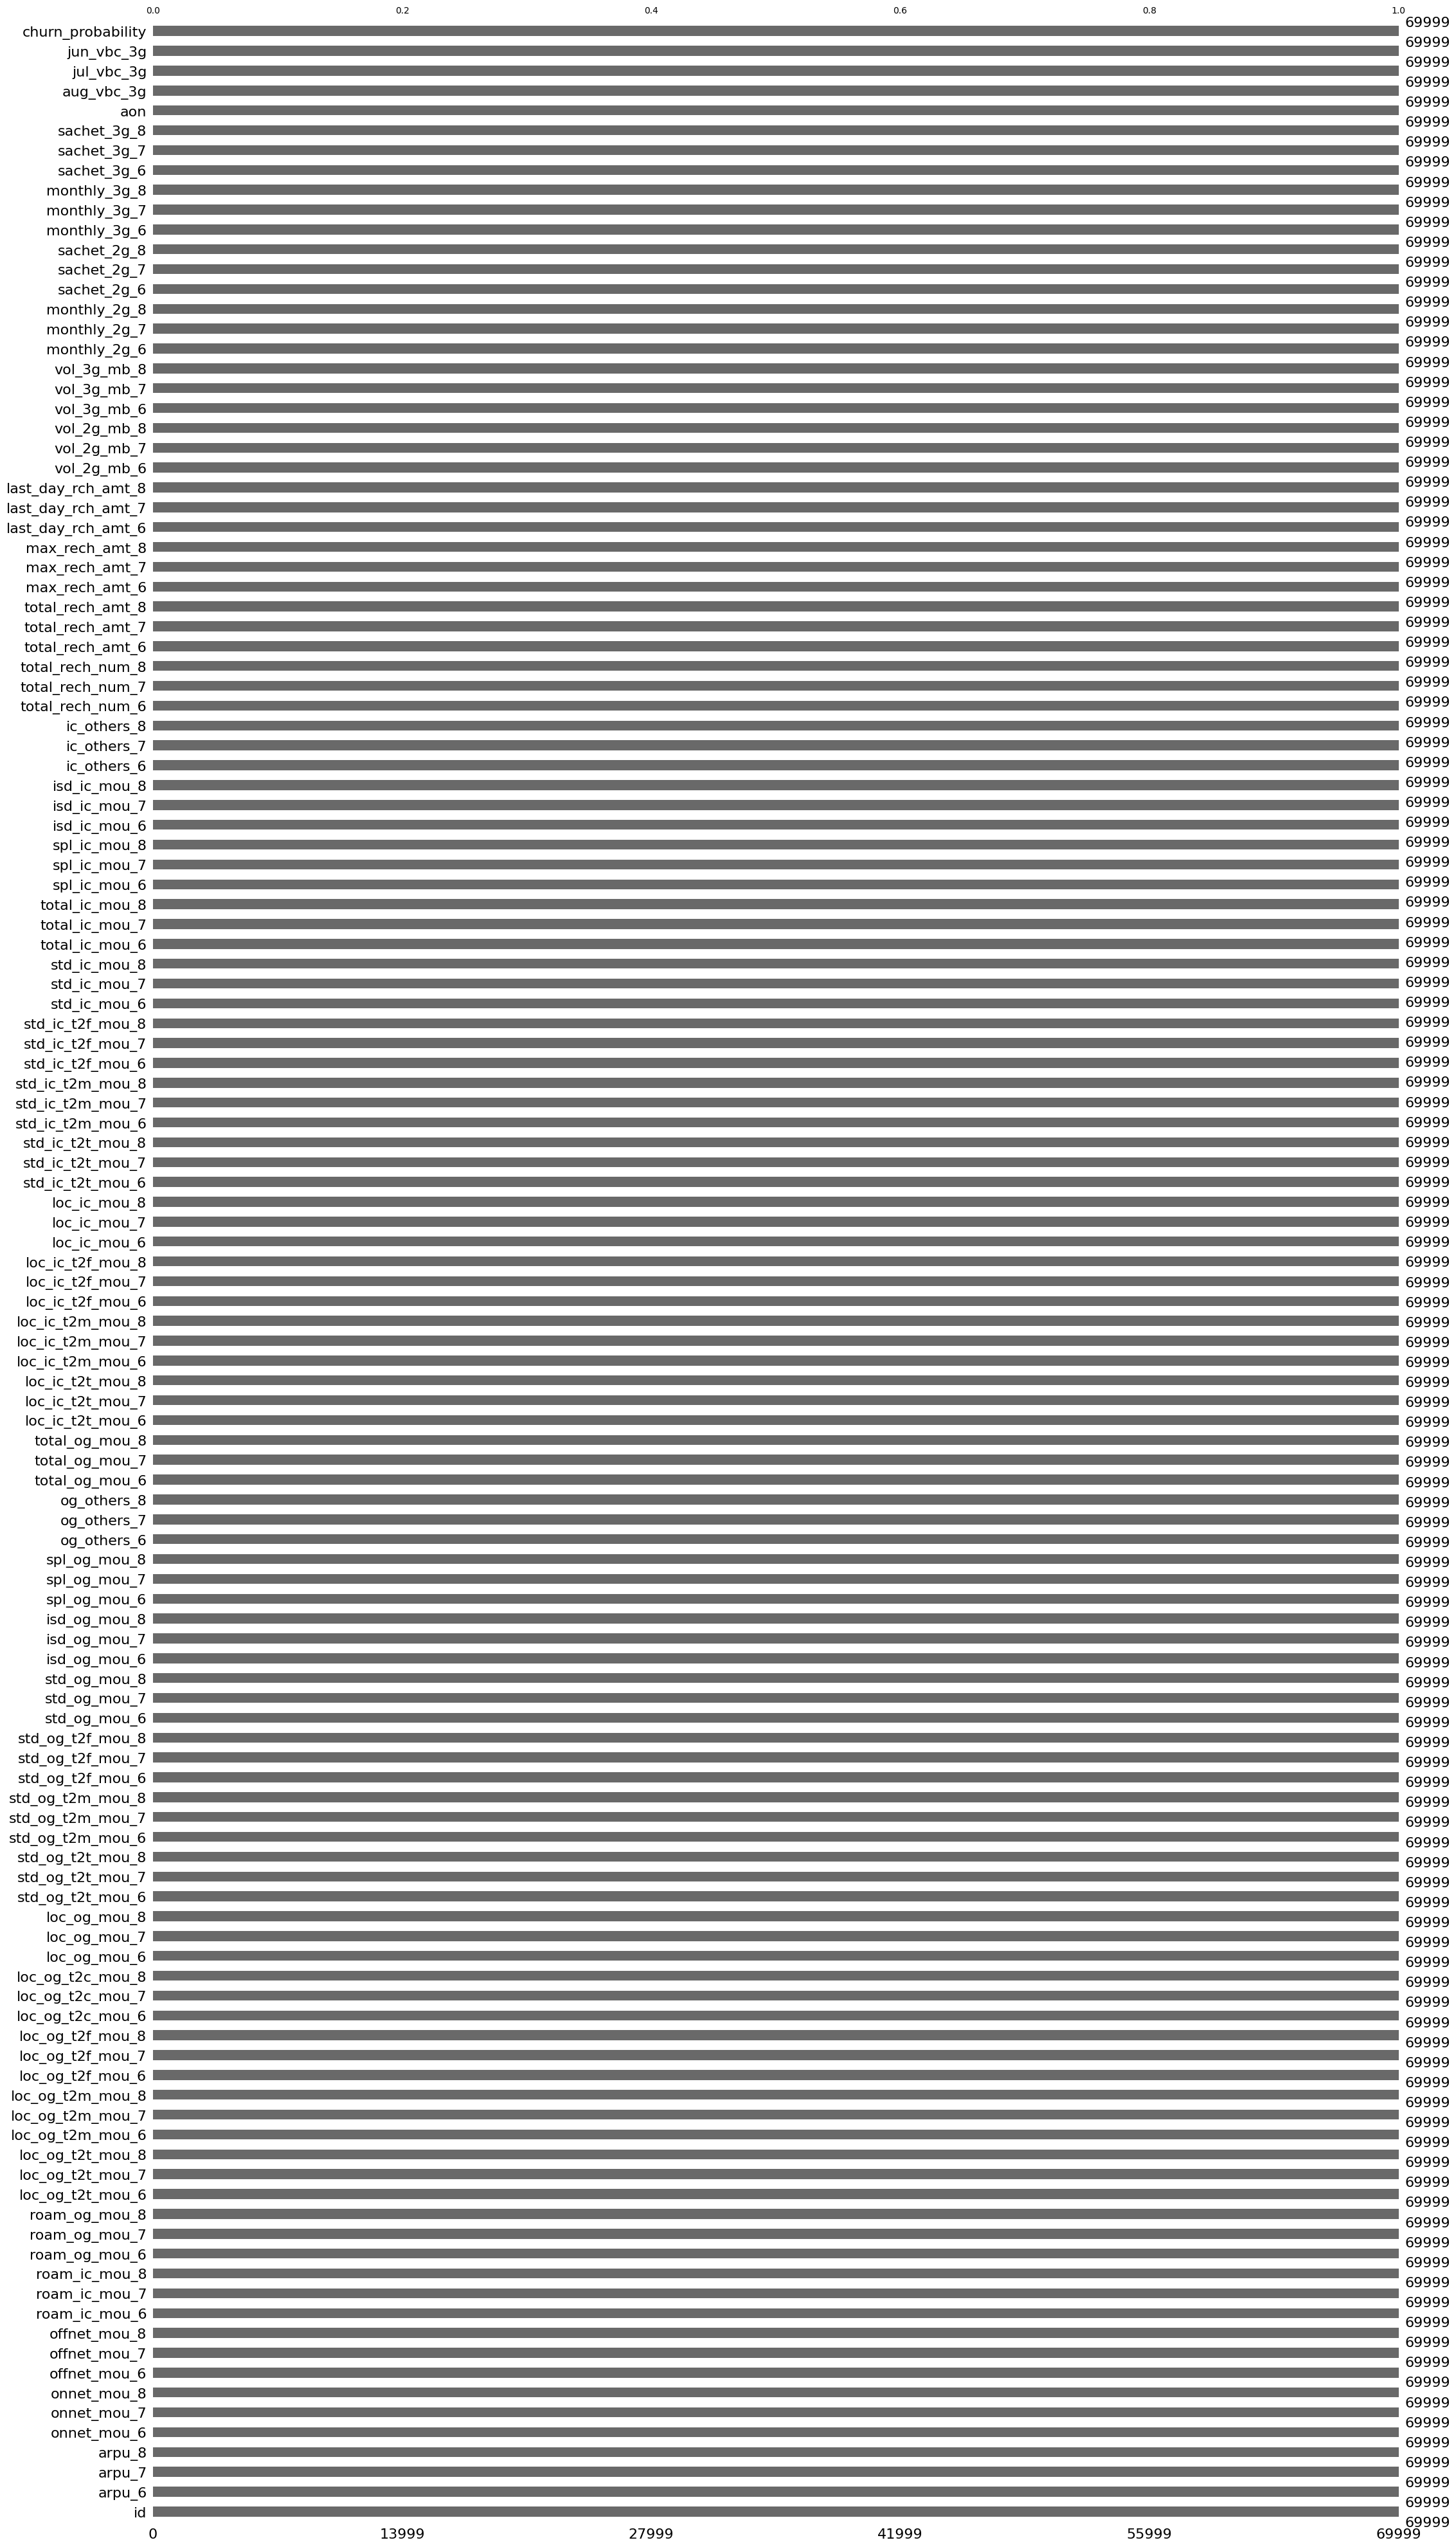

In [30]:
# Import the msno (Missingno) library for visualizing missing data in the DataFrame.
# The `bar()` function generates a bar plot to show the count of missing and non-missing values in each column of the DataFrame.

# Visualizing the missing data in the 'data_filtered_imputed' DataFrame:
# The bar plot will show the proportion of missing data (in white) and non-missing data (in black) for each column.
# This can help quickly identify which columns have missing data and how much of the data is missing.

msno.bar(data_filtered_imputed)

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12
churn_probability : 2


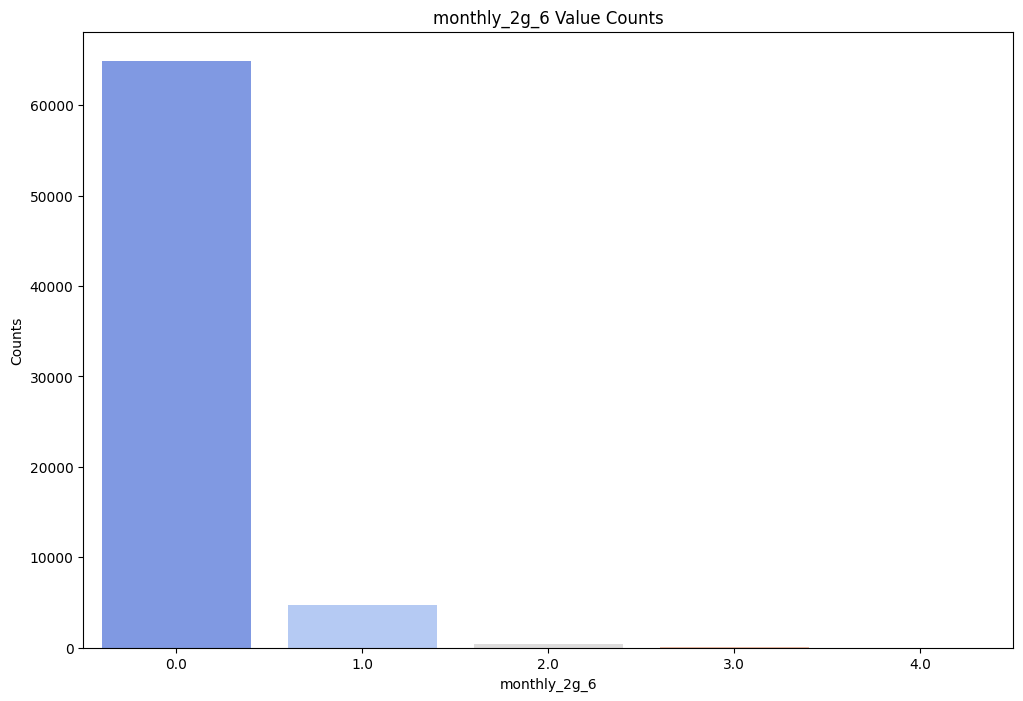

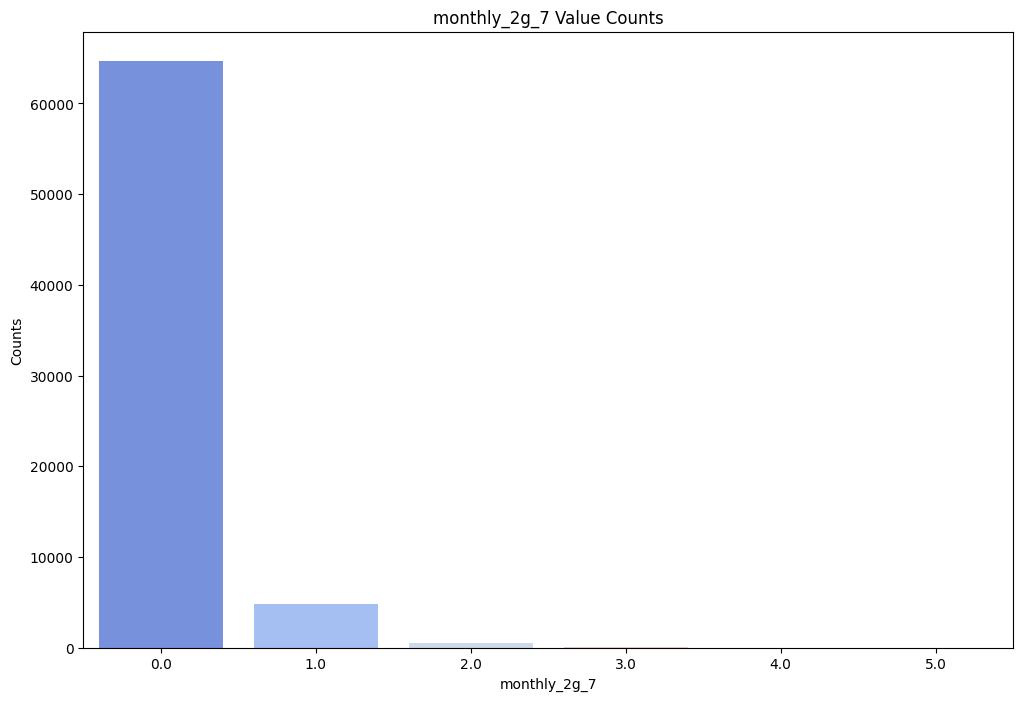

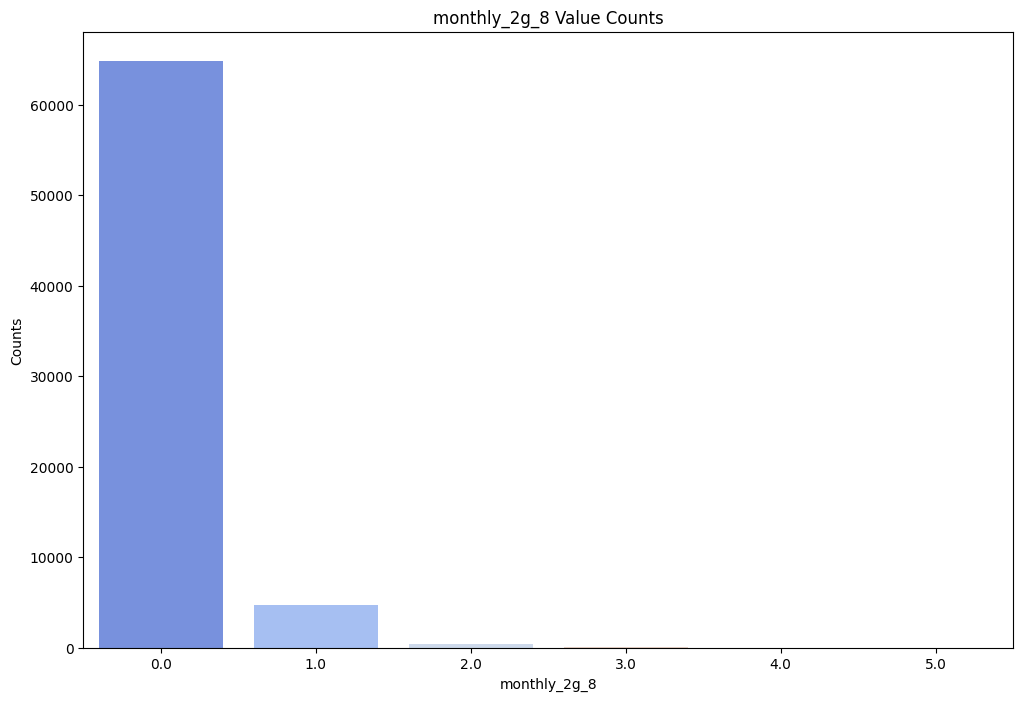

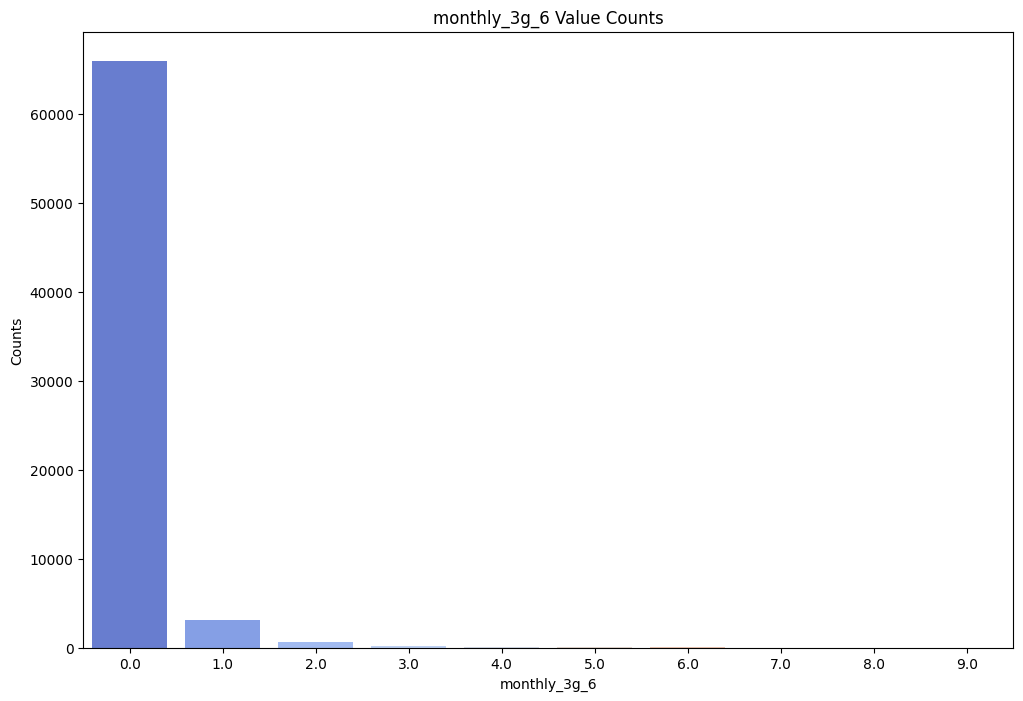

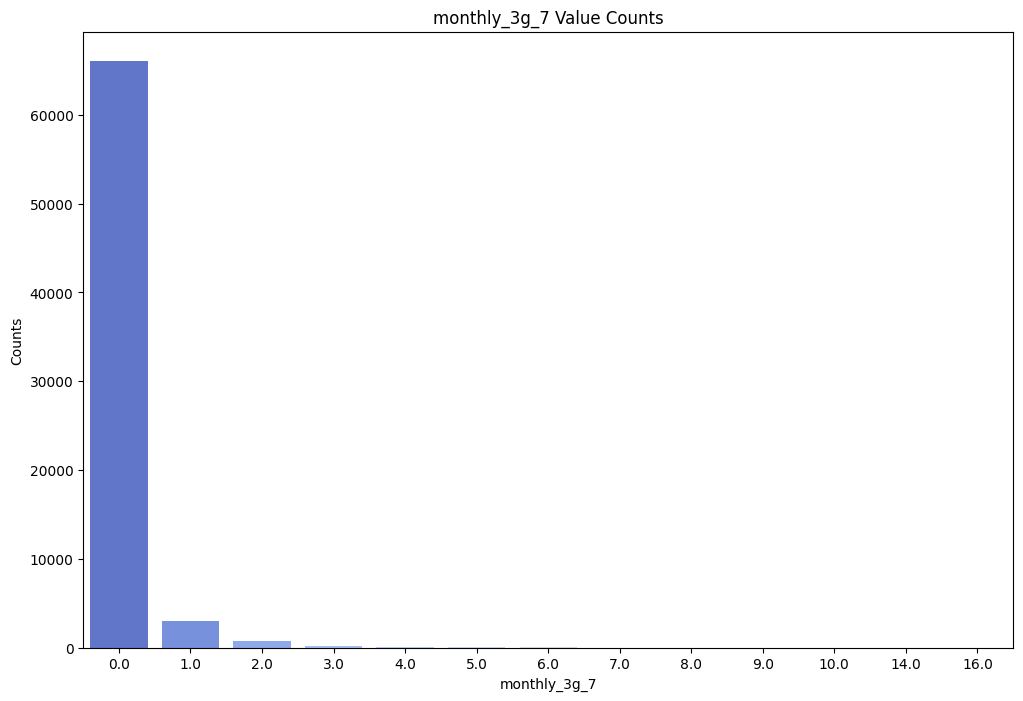

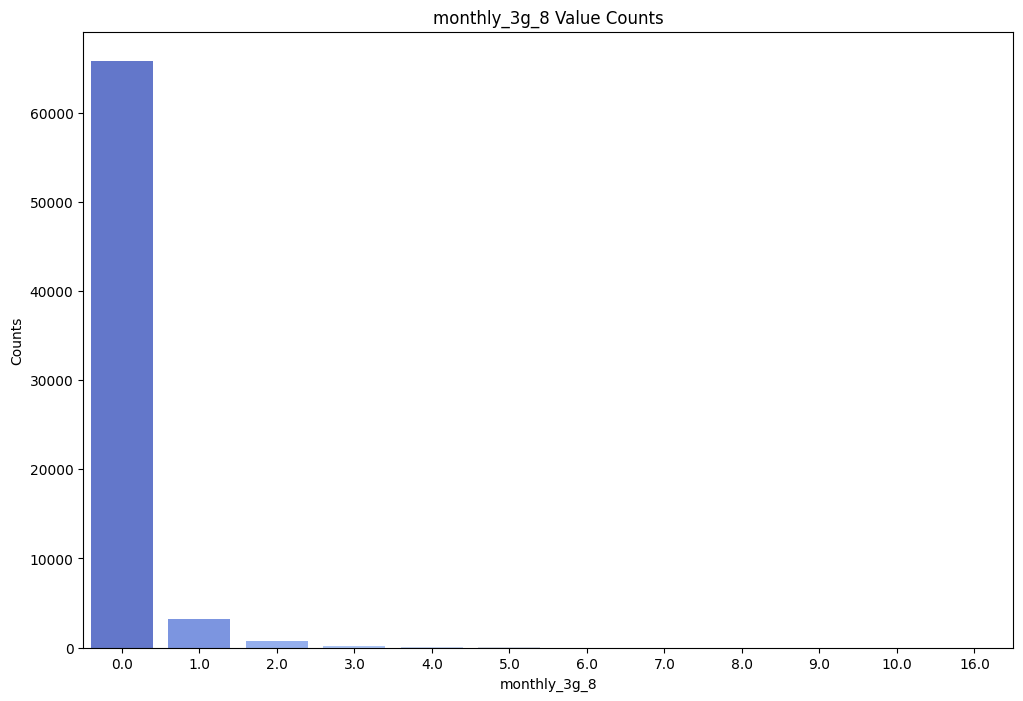

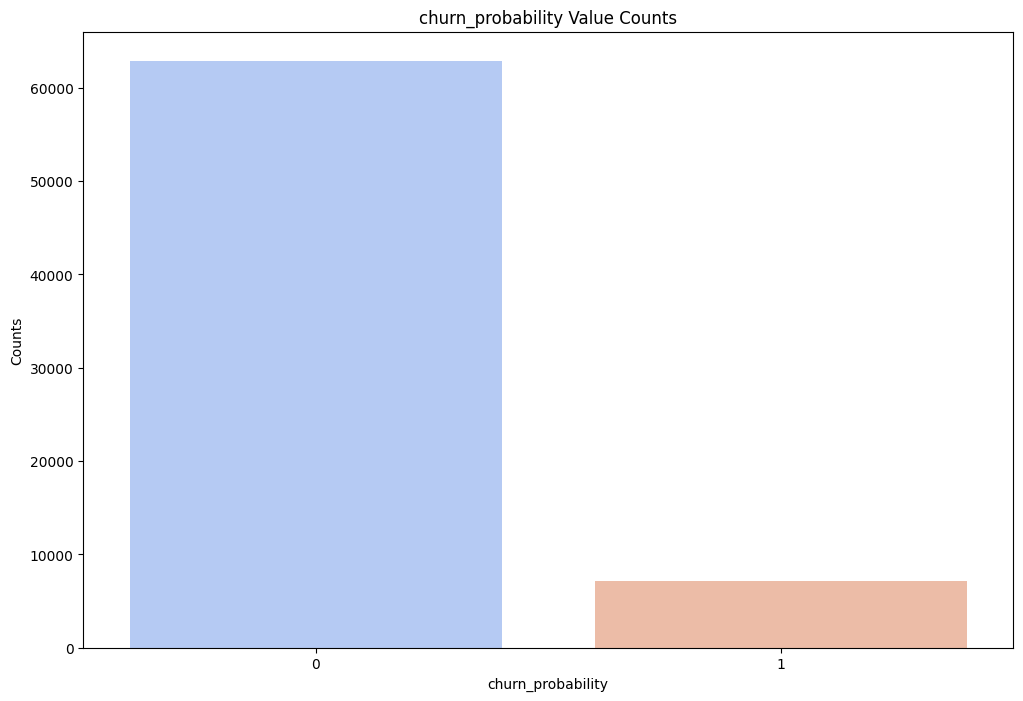

In [31]:
# List to store column names with fewer than 20 unique values
columns_with_few_unique_values = []

# Loop through each column in the dataframe
for column_name in data_filtered_imputed.columns:
    # Check if the column has fewer than 20 unique values
    if data_filtered_imputed[column_name].nunique() < 20:
        # Add the column to the list if it meets the condition
        columns_with_few_unique_values.append(column_name)
        # Print the column name and the number of unique values
        print(f'{column_name} : {data_filtered_imputed[column_name].nunique()}')

# Function to plot the value counts of a categorical column
def plot_category_counts(column_name):
    """
    This function plots a count plot for a given categorical column.
    - Displays a bar chart of the value counts for the column.
    - Customizes the plot with labels, title, and color palette.
    """
    plt.figure(figsize=(12, 8))  # Set the figure size
    sns.countplot(x=data_filtered_imputed[column_name], palette='coolwarm')  # Count plot with green to red color palette
    plt.xlabel(column_name)  # Set the x-axis label
    plt.ylabel('Counts')  # Set the y-axis label
    plt.title(f"{column_name} Value Counts")  # Set the title
    plt.show()  # Display the plot

# Loop through each column with fewer than 20 unique values and plot the category counts
for column_name in columns_with_few_unique_values:
    plot_category_counts(column_name)


## 3.3 Data Splitting

Lets create X and y datasets. After addressing missing data, the next step is to split the dataset into training and testing sets. This division ensures that the model can be trained on one subset of the data and evaluated on an independent subset, allowing for reliable performance assessment and mitigating the risk of overfitting.

In [32]:
X = data_filtered_imputed.iloc[:,:-1]
y = data_filtered_imputed.iloc[:,-1]

X.shape, y.shape

((69999, 125), (69999,))

In [33]:
X.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

Splitting train and test data to avoid any contamination of the test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 125), (14000, 125), (55999,), (14000,))

In [36]:
X_train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
28862  28862    3.500  495.994  560.511         0.00       567.51   
13489  13489  635.961  597.637  680.529      1173.38      1053.79   
31851  31851  167.046  102.452   79.331        52.61        23.84   
54797  54797  563.265  631.071  481.039      1090.56      1147.89   
1955    1955  355.603  503.764  772.110        35.08        77.54   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
28862       686.86          0.38        149.83        363.58           3.48   
13489      1189.78        372.28        155.04        282.04           0.00   
31851        19.46         63.54         73.19         53.38           0.00   
54797       993.66        123.63         99.43         64.06           0.00   
1955         51.79         35.74         14.28          7.59           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
28862            0.0            0.0           3.34            0.0   
13489            0.0            0.0           0.00            0.0   
31851            0.0            0.0           0.00            0.0   
54797            0.0            0.0           0.00            0.0   
1955             0.0            0.0           0.00            0.0   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
28862            0.0              0.00             14.78            132.76   
13489            0.0              2.91            154.96             36.99   
31851            0.0             52.61             23.84             19.46   
54797            0.0             15.48              9.19             51.84   
1955             0.0             35.08             77.54             51.79   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
28862              0.00             38.79            266.61               0.0   
13489             36.16             15.46             51.58               0.0   
31851             48.51             68.16             41.69               0.0   
54797             33.06             66.28             13.51               0.0   
1955              35.74             13.89              6.63               0.0   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
28862              0.00              0.00              0.00              0.00   
13489              0.00              0.00              5.38             18.49   
31851              0.00              0.00              0.00              0.00   
54797              0.00              0.76              0.00              0.00   
1955               0.38              0.96              0.00              0.00   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
28862              0.00          0.00         53.58        399.38   
13489             22.16         39.08        170.43         88.58   
31851              0.00        101.13         92.01         61.16   
54797              0.00         48.54         75.48         66.13   
1955               0.00         70.83         91.83         59.39   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
28862              0.00            552.73            554.09              0.00   
13489           1170.46            898.83           1152.78            330.68   
31851              0.00              0.00              0.00             15.03   
54797           1075.08           1138.69            941.81             90.56   
1955               0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
28862            111.03             94.86               0.0               0.0   
13489            114.91            205.01               0.0               0.0   
31851              5.03             11.56               0.0               0.0   
54797             33.14             

In [37]:
#Saving the list of final columns after handling all the missing data values.
new_vars = X_train.columns.tolist()

# Checking the length of the columns
print(len(new_vars))

# Checking the columns names
print(new_vars)

125
['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_m

# 4. Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

In [38]:
# Function to determine the data type of a variable
def determine_data_type(data):
    """
    Returns the data type of the agiven variable: 'numerical' or 'categorical'.
    Numerical data includes integers and floats, while categorical includes data 
    of 'category' type.
    """
    if data.dtype == np.int64 or data.dtype == np.float64:
        return 'numerical'  # Numerical data type
    elif data.dtype == 'category':
        return 'categorical'  # Categorical data type

# Function to plot and analyze univariate distributions (for a single variable)
def plot_univariate_distribution(variable, show_statistics=True):
    """
    Plots the univariate distribution for a given variable and prints statistics 
    if the variable is numerical or categorical.
    - If the variable is numerical, a histogram (distribution) is plotted.
    - If the variable is categorical, a count plot is displayed.
    - Prints descriptive statistics (or value counts) based on the variable type.
    """
    # Check if the variable is numerical
    if determine_data_type(variable) == 'numerical':
        sns.distplot(variable)  # Plot distribution (histogram + KDE) for numerical variable
        if show_statistics:  # Show statistics if requested
            print(variable.describe())  # Print descriptive statistics (mean, std, etc.)
    
    # Check if the variable is categorical
    elif determine_data_type(variable) == 'categorical':
        sns.countplot(variable)  # Plot count plot for categorical variable
        if show_statistics:  # Show statistics if requested
            print(variable.value_counts())  # Print frequency counts for categories
    
    else:
        print("Invalid variable passed: Only numeric or categorical variables are supported.")
        
# Function to plot bivariate relationships (for two variables)
def plot_bivariate_relationship(var1, var2):
    """
    Plots the bivariate relationship between two variables:
    - If both variables are numerical, a regression plot (scatter + line) is plotted.
    - If one variable is categorical and the other is numerical, a box plot is used.
    """
    # If both variables are numerical, use a regression plot
    if determine_data_type(var1) == 'numerical' and determine_data_type(var2) == 'numerical':
        sns.regplot(var1, var2)  # Regression plot for numerical vs numerical
    
    # If one variable is numerical and the other is categorical, use a box plot
    elif (determine_data_type(var1) == 'categorical' and determine_data_type(var2) == 'numerical') or \
         (determine_data_type(var1) == 'numerical' and determine_data_type(var2) == 'categorical'):        
        sns.boxplot(x=var1, y=var2)  # Box plot for numerical vs categorical

count    55999.000000
mean       128.120650
std        307.312679
min       -234.497116
25%          6.260000
50%         30.960000
75%        109.760000
max      10752.560000
Name: onnet_mou_8, dtype: float64


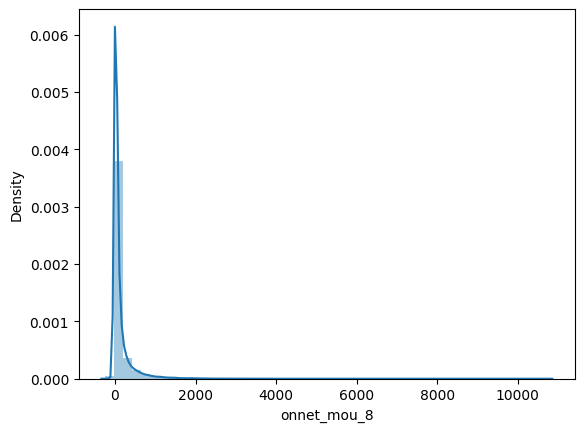

In [39]:
plot_univariate_distribution(X_train.onnet_mou_8)

<Axes: xlabel='churn_probability', ylabel='Count'>

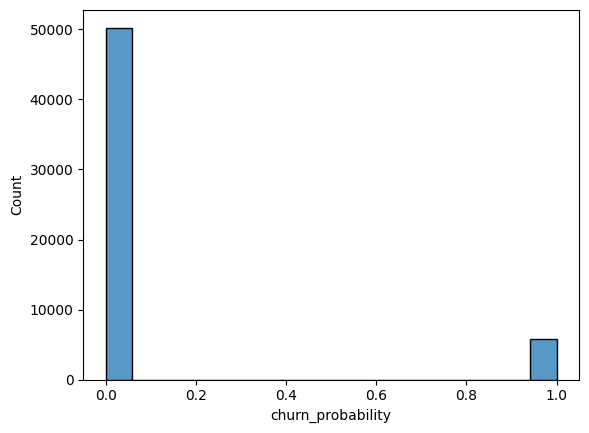

In [40]:
#Distribution for the churn probability
sns.histplot(y_train)

<Axes: >

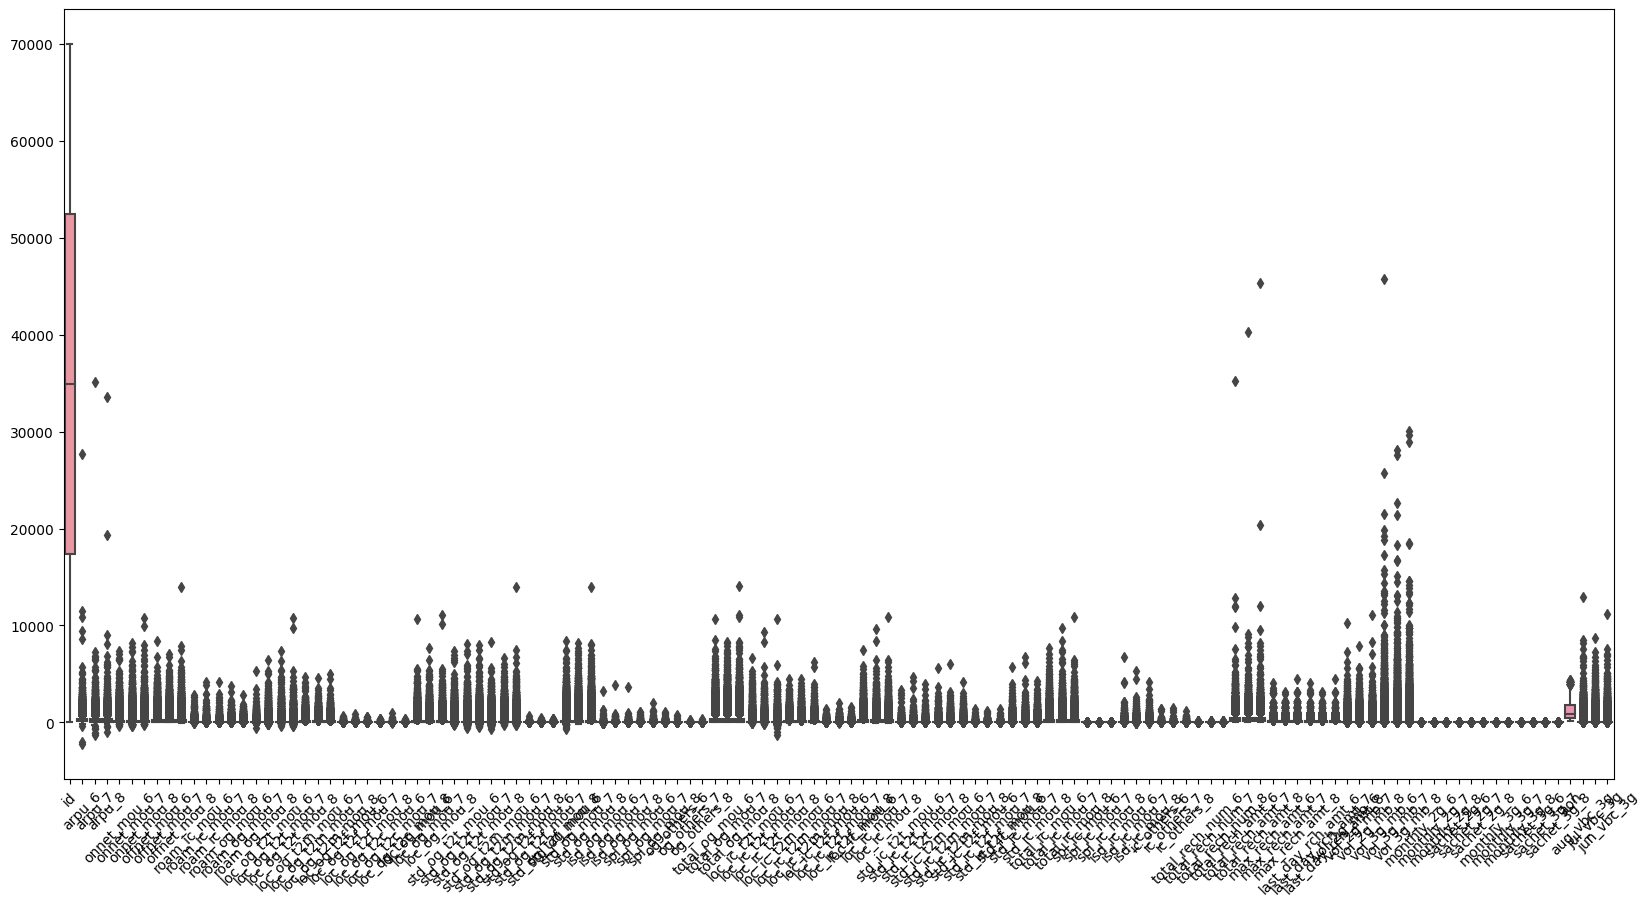

In [41]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

## 4.1 Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [42]:
def cap_outliers(array, k=3):
    if array.dtype in ['float64', 'int64']:  # Ensure the array is numeric
        upper_limit = array.mean() + k * array.std()
        lower_limit = array.mean() - k * array.std()
        array[array < lower_limit] = lower_limit
        array[array > upper_limit] = upper_limit
    return array

<Axes: >

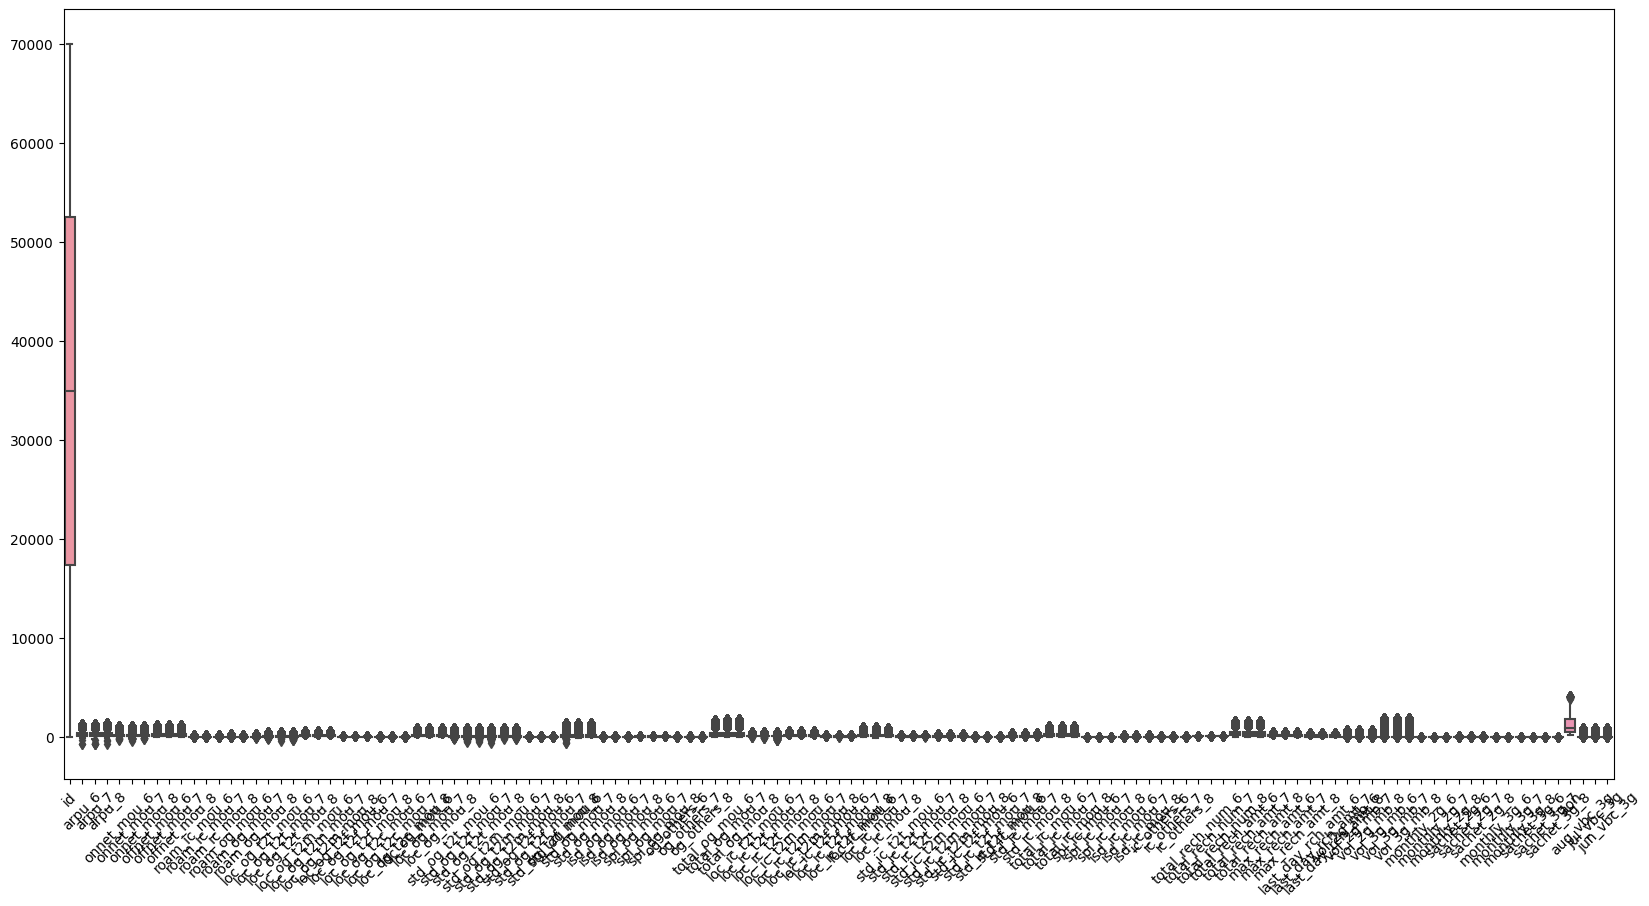

In [43]:
# Apply the function only to numeric columns
# X_train_filtered_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_train_capped = X_train.apply(cap_outliers, axis=0)

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_capped)

## 4.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [44]:
scale = StandardScaler()
X_train_filtered = scale.fit_transform(X_train_capped)

In [45]:
X_train_filtered.shape

(55999, 125)

<Axes: >

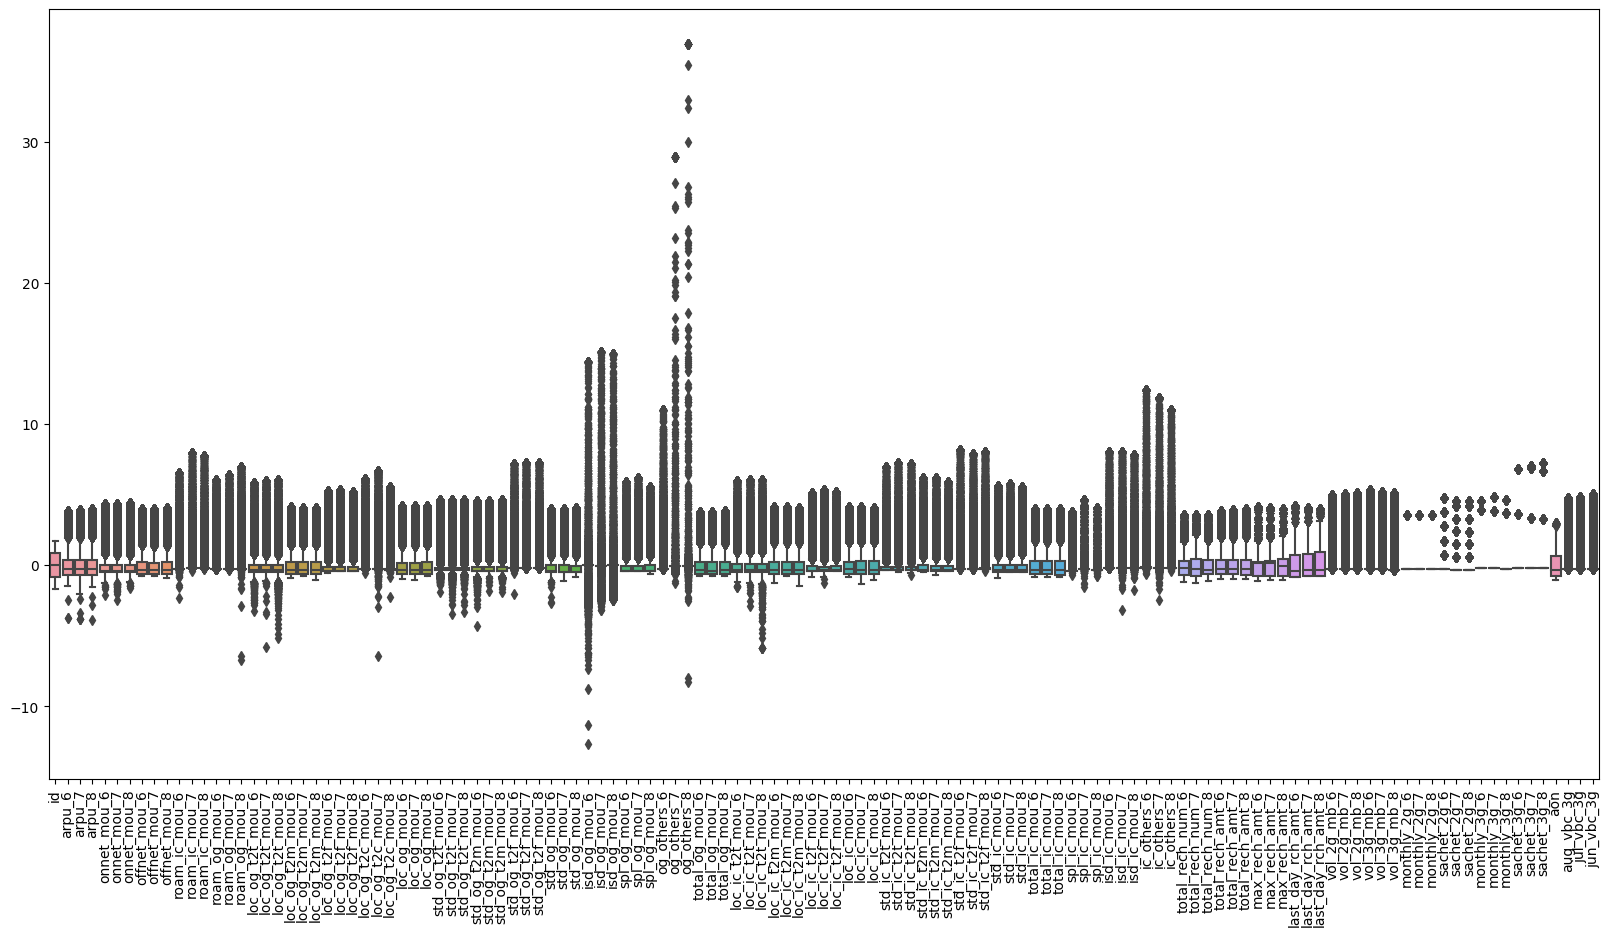

In [46]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = pd.DataFrame(X_train_filtered, columns=new_vars))

You can also perform feature transformations at this stage. 

1. **Positively skewed:** Common transformations of this data include square root, cube root, and log.
2. **Negatively skewed:** Common transformations include square, cube root and logarithmic.

Please read the following link to understand how to perform feature scaling and preprocessing : https://scikit-learn.org/stable/modules/preprocessing.html
 
Lets also plot the correlations for each feature for bivariate analysis.

<Axes: >

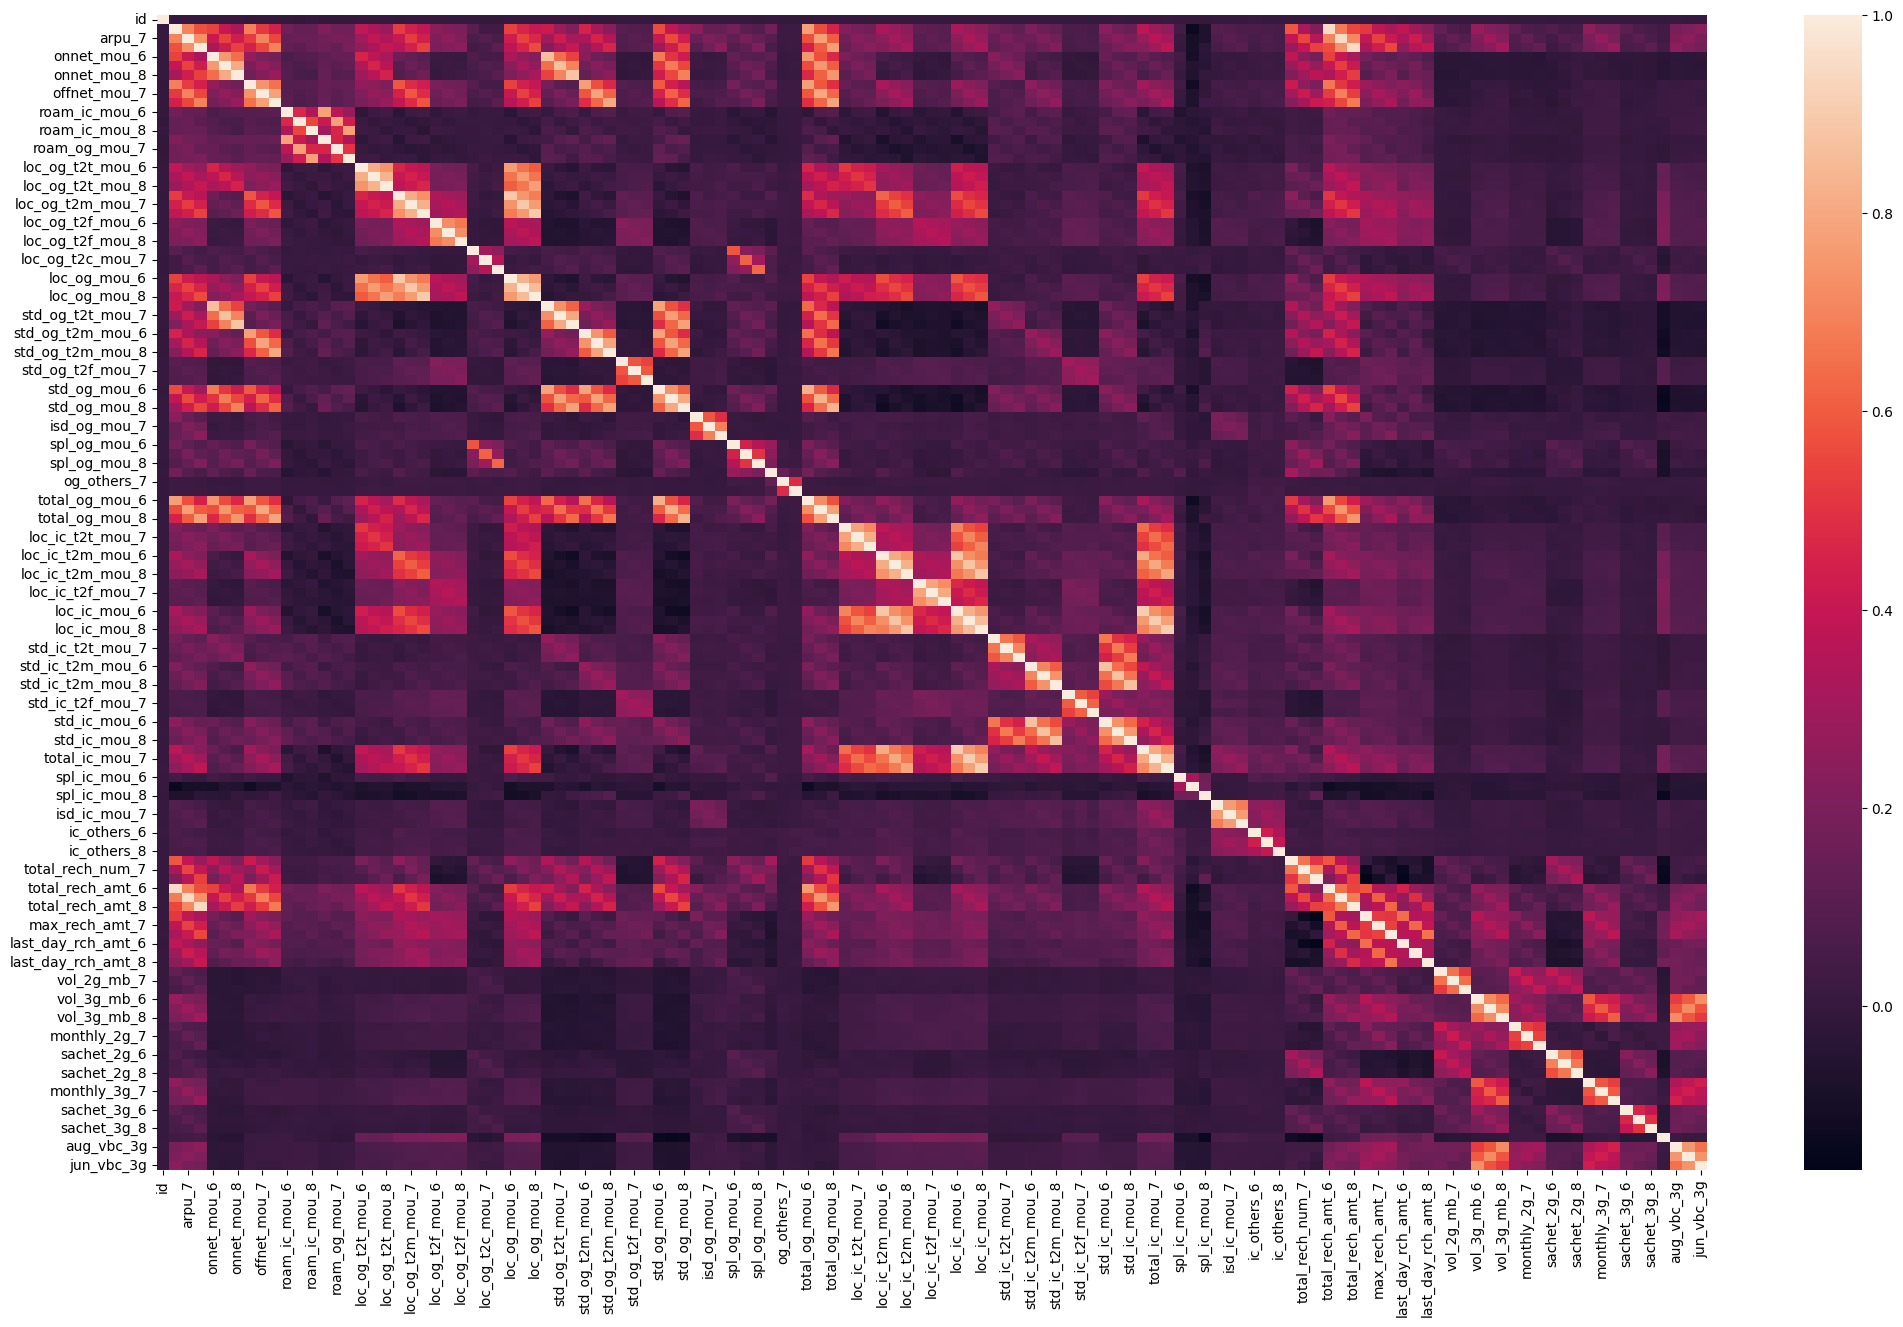

In [47]:
plt.figure(figsize=(25,15))
sns.heatmap(pd.DataFrame(X_train_filtered, columns=new_vars).corr())

# 5. Feature Engineering and Selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

## 5.1 Feature Engineering using RandomForestClassifier

Feature engineering with the RandomForestClassifier involves utilizing the model's ability to assess feature importance. Random forests are ensemble methods that can capture complex relationships within the data, and by training a RandomForest model, you can identify which features contribute most to predicting the target variable. These important features can then be selected or transformed to improve the performance of other machine learning models. Feature importance values derived from the RandomForestClassifier provide valuable insights into which attributes have the highest predictive power, enabling more informed decisions during data preprocessing and feature selection.

In [48]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered, y_train)

RandomForestClassifier(n_jobs=-1)

In [49]:
feature_importances = pd.DataFrame({'col':new_vars, 'importance':rf.feature_importances_})
feature_importances.shape

(125, 2)

<BarContainer object of 125 artists>

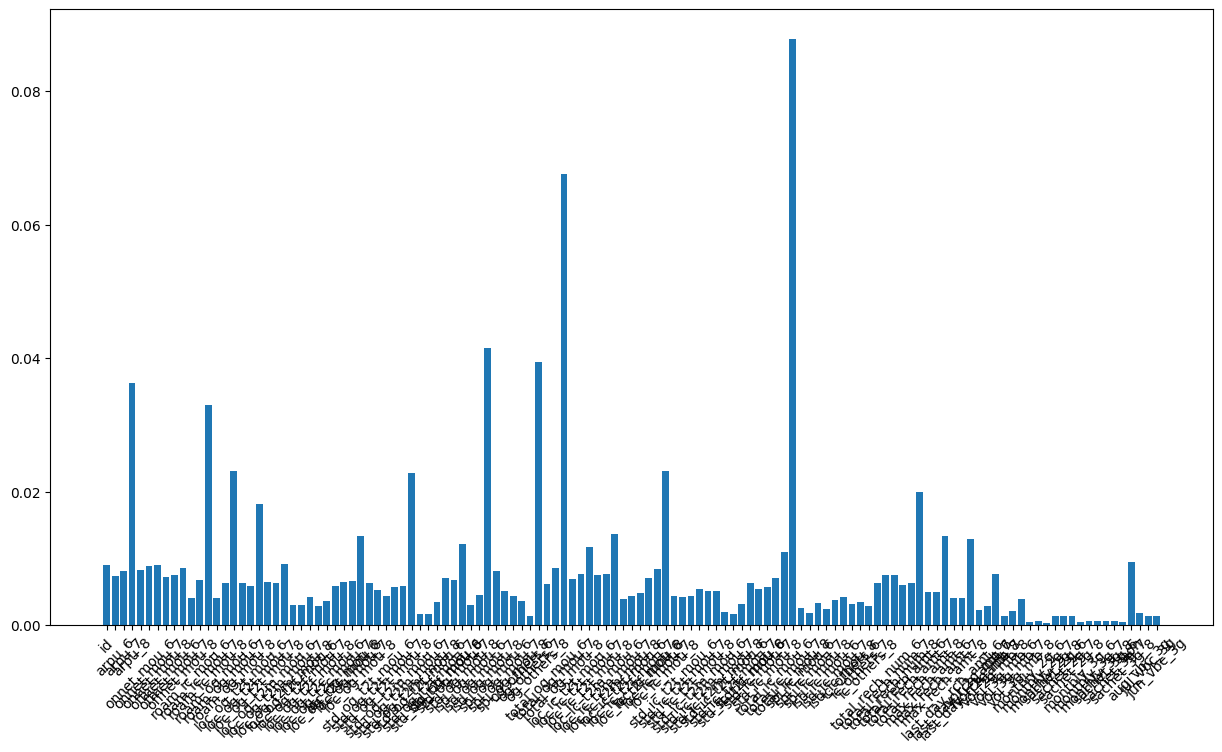

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

**RandomForestClassifier - Using a Fixed Cutoff (e.g., Importance >= 0.01)**


In [51]:
# Define a cutoff threshold for importance
cutoff = 0.01

# Filter features based on the cutoff
important_features = feature_importances[feature_importances['importance'] >= cutoff]

# Display the important features
important_features.shape

(18, 2)

**RandomForestClassifier - Using a Relative Cutoff (Top X% Most Important Features)**

In [52]:
# Sort the features based on their importance in descending order
sorted_features = feature_importances.sort_values(by='importance', ascending=False)

# Calculate how many top features to select (e.g., top 20%)
top_percentage = 0.2
num_top_features = int(len(sorted_features) * top_percentage)

# Select the top X% features
top_important_features = sorted_features.head(num_top_features)

# Display the top important features
top_important_features.shape

(25, 2)

In [53]:
# Display the top features
print(f"Total Number of Top Importances Feature: {len(top_important_features['col'].tolist())}")
print(top_important_features['col'].tolist())

Total Number of Top Importances Feature: 25
['total_ic_mou_8', 'total_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'std_og_t2m_mou_8', 'total_rech_amt_8', 'loc_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'max_rech_amt_8', 'loc_og_mou_8', 'last_day_rch_amt_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'total_ic_mou_7', 'aon', 'loc_og_t2m_mou_8', 'id', 'onnet_mou_8', 'onnet_mou_7', 'offnet_mou_8', 'total_og_mou_7']


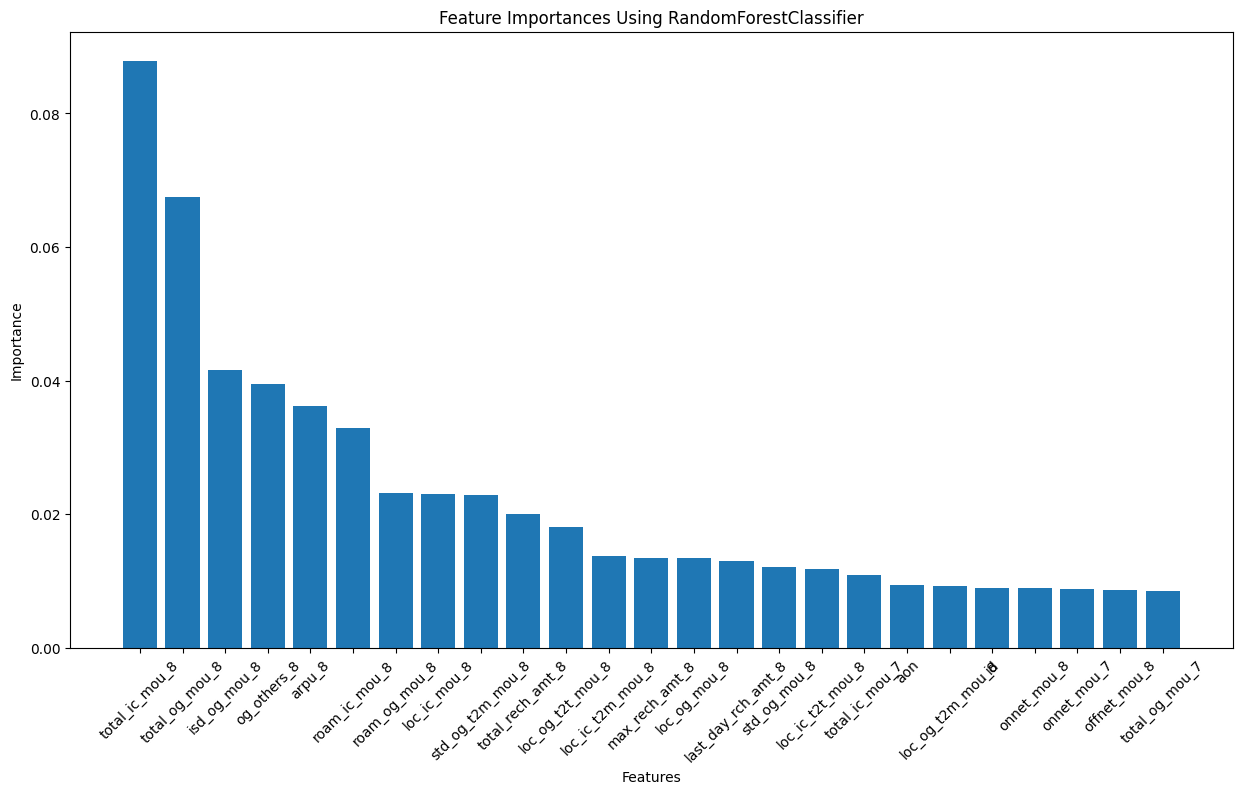

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(top_important_features['col'], top_important_features['importance'])
plt.title("Feature Importances Using RandomForestClassifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [55]:
# tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2D
# X_train_tsne = tsne.fit_transform(X_train_filtered)

# print(X_train_tsne.shape)

In [56]:
# # Step 5 (optional): Visualize the t-SNE result
# plt.figure(figsize=(15, 8))
# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
# plt.colorbar()  # Color bar to indicate different classes
# plt.title("t-SNE visualization of the dataset")
# plt.show()

## 5.2 Feature Engineering using XGBoost

In [57]:
# Define and fit the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, n_jobs=-1)
xgb_model.fit(X_train_filtered, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# Extract feature importances
feature_importances = pd.DataFrame({'col': new_vars, 'importance': xgb_model.feature_importances_})

# Sort the feature importances in ascending order
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

# Set the number of top features you want to select (e.g., top 10 features)
top_x = 25

# Select the top X features
top_features = feature_importances_sorted.head(top_x)

# Display the top features
print(f"Total Number of Feature Importances: {len(top_features['col'].tolist())}")
print(top_features['col'].tolist())

Total Number of Feature Importances: 25
['total_ic_mou_8', 'vol_2g_mb_8', 'roam_og_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_ic_mou_8', 'loc_ic_mou_7', 'roam_ic_mou_8', 'spl_og_mou_6', 'roam_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_amt_8', 'total_rech_num_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'total_ic_mou_7', 'max_rech_amt_8', 'std_ic_t2f_mou_6', 'aon', 'total_ic_mou_6']


In [59]:
# Check the shape of the feature importance DataFrame
print(feature_importances.shape)

(125, 2)


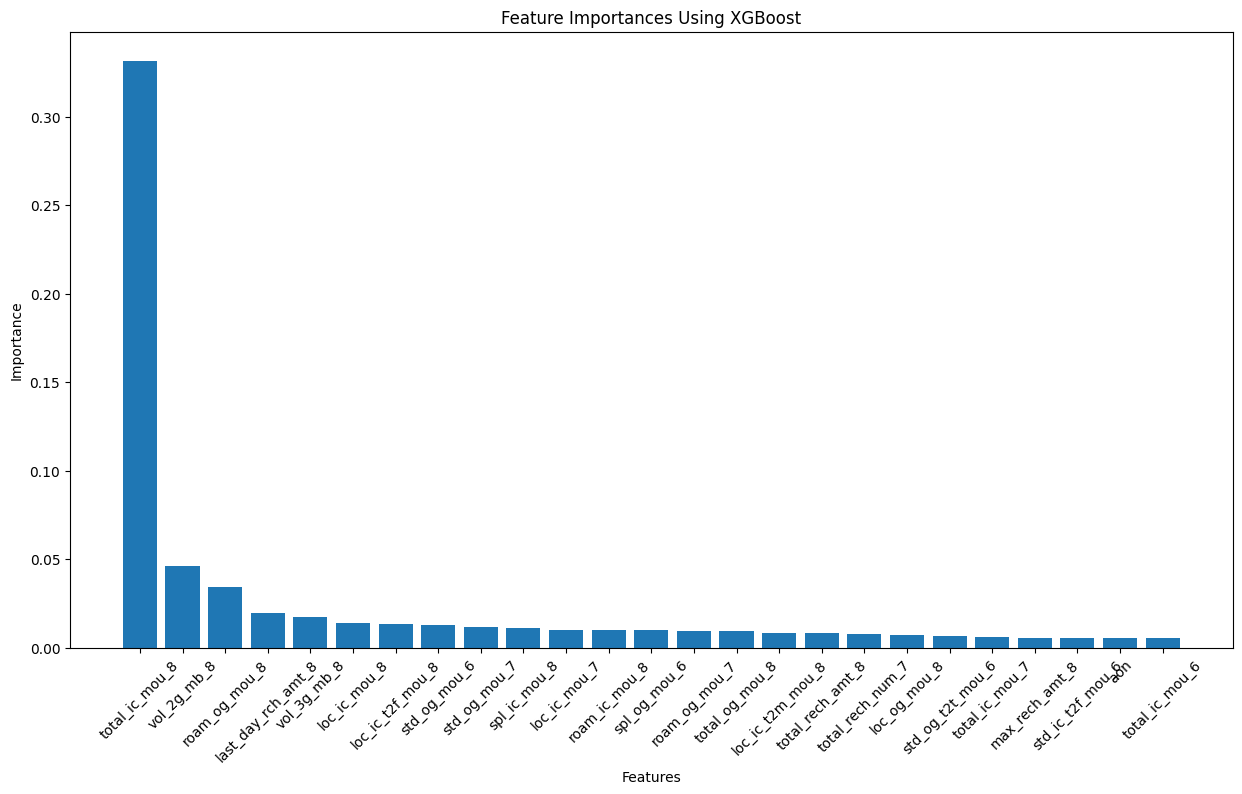

In [60]:
# Plot the feature importances
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(top_features['col'], top_features['importance'])
plt.title("Feature Importances Using XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## 5.3 Feature Engineering using PCA (Principal Component Analysis)

Feature engineering with PCA involves reducing the dimensionality of the dataset while retaining the most significant information. PCA is a linear technique that transforms the original features into a new set of uncorrelated variables, called principal components, ordered by the amount of variance they explain in the data. By selecting the top principal components, you can reduce the complexity of the data, eliminate multicollinearity, and potentially improve the performance of machine learning models. PCA is particularly useful when dealing with high-dimensional data, as it helps in uncovering underlying patterns while simplifying the feature space.

<Axes: >

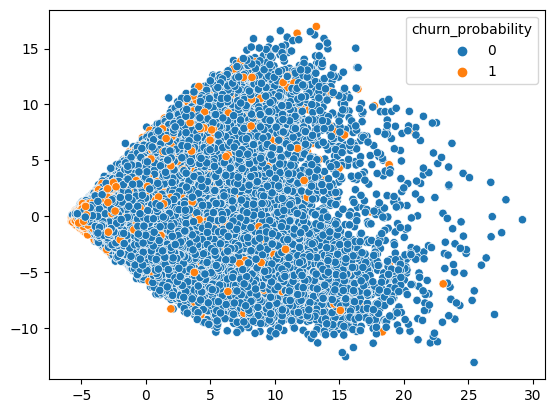

In [61]:
pca = PCA()
pca_components = pca.fit_transform(X_train_filtered)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<Axes: >

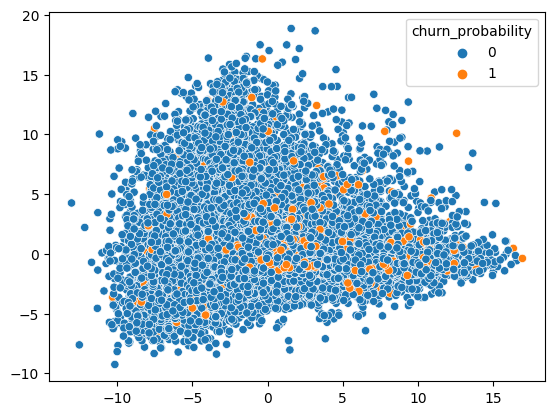

In [62]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

In [63]:
#Consider features contributing to 95% variance
pca_model = PCA(0.95)

In [64]:
X_train_pca_reduced = pca_model.fit_transform(X_train_filtered)
X_train_pca_reduced.shape

(55999, 70)

In [65]:
X_train_pca_reduced

array([[ 1.73371988e+00,  4.52591411e+00, -1.64297915e+00, ...,
         5.87010325e-01,  2.54928236e-01, -2.03922515e-01],
       [ 5.75899609e+00,  1.10859307e+01, -8.59888852e-01, ...,
        -2.44428301e-01, -4.28555770e-01, -1.49464245e-01],
       [-3.69021561e+00, -3.73139812e-01, -8.84204974e-01, ...,
        -7.34467879e-03, -2.01064319e-01,  9.28506550e-02],
       ...,
       [-2.94324526e+00,  1.25092581e+00, -9.05010261e-01, ...,
        -4.30624384e-03, -2.76457289e-01, -3.77080629e-03],
       [ 7.35195612e+00,  1.01289696e+01, -9.37609356e-01, ...,
         1.59360514e+00, -4.16194486e-01,  2.11335994e-01],
       [-2.38202854e+00,  4.74096050e-01,  3.84902563e+00, ...,
        -1.39158927e-01, -2.28470367e-01,  9.75626123e-02]])

# 6. Model Training, Prediction and Evaluation
Building and training the machine learning model(s) using the prepared data, and fine-tuning hyperparameters to improve model performance. Predicting churn on both the training and test datasets and evaluating the model’s performance using appropriate metrics, such as accuracy, precision, recall, and F1 score.

In [66]:
def print_metrics(y, y_pred):
    """
    This function prints various performance metrics for a model's predictions.
    
    Parameters:
    y (array-like): True labels of the data (actual values).
    y_pred (array-like): Predicted labels from the model.
    """
    
    # Confusion Matrix: Displays the true positives, false positives, true negatives, and false negatives.
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    
    # Accuracy Score: The fraction of correctly predicted instances out of all instances.
    print("Accuracy Score: ", round(accuracy_score(y, y_pred), 2))
    
    # Precision Score: The fraction of true positive predictions among all positive predictions.
    print("Precision Score: ", round(precision_score(y, y_pred), 2))
    
    # Recall Score: The fraction of true positive predictions among all actual positive instances.
    print("Recall Score: ", round(recall_score(y, y_pred), 2))
    
    # ROC AUC Score: Measures the area under the Receiver Operating Characteristic curve.
    print("ROC AUC Score: ", round(roc_auc_score(y, y_pred), 2))
    
    # F1 Score: The harmonic mean of Precision and Recall, a balanced measure for classification tasks.
    print("F1 Score: ", round(f1_score(y, y_pred), 2))

## 6.1 Model 1 - Combining PCA with Logistic Regression Based on Class Weight

Model 1, combining Principal Component Analysis (PCA) with Logistic Regression based on class_weight, offers a robust approach for classification tasks with imbalanced datasets. PCA is used to reduce the dimensionality by extracting the most significant features, improving computational efficiency and handling multicollinearity. Logistic Regression is then applied, with the class_weight parameter adjusted to address class imbalance by giving more importance to the minority class during training. This approach helps improve the model's accuracy in predicting the underrepresented class, while benefiting from the reduced feature space provided by PCA. The combination is efficient and effective for imbalanced data classification.

In [67]:
X_train_pca_reduced.shape
X_train_pca_reduced
len(new_vars)

125

In [68]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
model1 = lr.fit(X_train[new_vars], y_train)

In [69]:
#print accuracy score
model1.score(X_train[new_vars], y_train)

0.8325862961838604

Let's create a pipeline to efficiently fit and score the model. This pipeline includes several key steps to streamline the process:

1. **Imputation**: Handle missing values in the dataset.
2. **Scaling**: Normalize the features for better performance.
3. **PCA (Principal Component Analysis)**: Reduce the dimensionality by extracting the most significant features.
4. **Classification Model**: Apply the chosen classification algorithm to make predictions.

This is just one example of a pipeline, designed to process data and build a model quickly and efficiently, improving both performance and workflow automation.

In [70]:
imp = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)
scale = StandardScaler()
pca = PCA(0.95)
lr = LogisticRegression(class_weight='balanced', random_state=42)

In [71]:
pipe1 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [72]:
pipe1.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 IterativeImputer(n_nearest_features=5, random_state=0)),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [73]:
train_score = pipe1.score(X_train[new_vars], y_train)
print("Model 1 - Training accuracy:", train_score)

Model 1 - Training accuracy: 0.79990714119895


In [74]:
y_train_pred = pipe1.predict(X_train[new_vars])

### Model 1 - Predicts on Train Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [75]:
print_metrics(y_train, y_train_pred)

Confusion Matrix:
[[39975 10283]
 [  922  4819]]
Accuracy Score:  0.8
Precision Score:  0.32
Recall Score:  0.84
ROC AUC Score:  0.82
F1 Score:  0.46


In [76]:
test_score = pipe1.score(X_test[new_vars], y_test)
print("Model 1 - Test accuracy:", test_score)

Model 1 - Test accuracy: 0.7995


In [77]:
y_test_pred = pipe1.predict(X_test[new_vars])

### Model 1 - Predicts on Test Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [78]:
print_metrics(y_test, y_test_pred)

Confusion Matrix:
[[10049  2560]
 [  247  1144]]
Accuracy Score:  0.8
Precision Score:  0.31
Recall Score:  0.82
ROC AUC Score:  0.81
F1 Score:  0.45


### Summary of Model 1 - PCA with Logistic Regression Using Class Weight

This model combines Principal Component Analysis (PCA) with Logistic Regression, incorporating class weights to address class imbalance. The model achieved an **accuracy score of 0.79 on the training set** and maintained the same **accuracy of 0.79 on the test set**, indicating consistent performance across both datasets.

## 6.2 Model 2 - PCA with Logistic Regression Based on Max Iteration

Model 2 combines Principal Component Analysis (PCA) with Logistic Regression, using the `max_iter` parameter to control the number of iterations during model training. PCA is applied first to reduce the dimensionality of the dataset, extracting the most significant features while retaining important information. Logistic Regression is then used for classification, and the `max_iter` parameter ensures the model converges by setting a maximum limit on the number of iterations the algorithm can run. This approach helps balance training efficiency and model accuracy, ensuring that the logistic regression model converges within a reasonable time while benefiting from dimensionality reduction.


In [79]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:70], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [80]:
lr.score(pca_components[:,:70], y_train)

0.9231950570545903

Let's create a pipeline to efficiently fit and score the model. This pipeline includes several key steps to streamline the process:

1. **Imputation**: Handle missing values in the dataset to ensure data quality.
2. **Scaling**: Normalize the features so that they have a similar scale, improving model performance.
3. **PCA (Principal Component Analysis)**: Reduce the dimensionality of the dataset by selecting the most significant features. We set the `PCA` to 0.95, meaning we retain those principal components that capture 95% of the variance in the data. This helps preserve essential information while reducing noise.
4. **Classification Model**: Apply the chosen classification algorithm, such as Logistic Regression, to make predictions based on the transformed data.

This pipeline helps automate and streamline the workflow, balancing model accuracy with computational efficiency. It reduces feature complexity, improves performance, and ensures the model is trained and scored more quickly, while retaining essential information from the dataset.

In [81]:
imp = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)
scale = StandardScaler()
pca = PCA(0.95)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [82]:
pipe2 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [83]:
pipe2.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 IterativeImputer(n_nearest_features=5, random_state=0)),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [84]:
y_train_pred = pipe2.predict(X_train[new_vars])

In [85]:
train_score = pipe2.score(X_train[new_vars], y_train)
print("Model 2 - Training accuracy:", train_score)

Model 2 - Training accuracy: 0.9231771995928498


### Model 2 - Predicts on Train Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [86]:
print_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49510   748]
 [ 3554  2187]]
Accuracy Score:  0.92
Precision Score:  0.75
Recall Score:  0.38
ROC AUC Score:  0.68
F1 Score:  0.5


In [87]:
test_score = pipe2.score(X_test[new_vars], y_test)
print("Model 2 - Test accuracy:", test_score)

Model 2 - Test accuracy: 0.9202142857142858


In [88]:
y_test_pred = pipe2.predict(X_test[new_vars])

### Model 2 - Predicts on Test Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [89]:
print_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12346   263]
 [  854   537]]
Accuracy Score:  0.92
Precision Score:  0.67
Recall Score:  0.39
ROC AUC Score:  0.68
F1 Score:  0.49


### Summary of Model 2 - PCA with Logistic Regression Using Max Iteration

This model combines Principal Component Analysis (PCA) with Logistic Regression, utilizing the `max_iter` parameter to control the maximum number of iterations during training. The model achieved an **accuracy score of 0.92 on the training set** and **accuracy score of 0.91 on the test set**, demonstrating strong performance and generalization across both datasets.

## 6.3 Model 3 - PCA  and Logistic Regression using Cross Validation
Model 3 combines Principal Component Analysis (PCA) with Logistic Regression and incorporates Cross-Validation to enhance model evaluation. PCA is used to reduce the dimensionality of the dataset, capturing the most significant features while eliminating noise. Logistic Regression is then applied for classification. Cross-Validation is employed to assess the model's performance by splitting the data into multiple subsets, training the model on some subsets, and testing it on others. This process helps in identifying potential overfitting and provides a more reliable estimate of the model's generalization ability. The combination of PCA, Logistic Regression, and Cross-Validation ensures robust and accurate model performance.

In [90]:
# Observe Class Imbalance
y_train.value_counts()/y_train.shape

churn_probability
0    0.89748
1    0.10252
Name: count, dtype: float64

In [91]:
lr = LogisticRegression(class_weight={0:0.1, 1: 0.9}, max_iter=1000, tol=0.001)
model3 = lr.fit(X_train[new_vars], y_train)

In [92]:
#print accuracy score
model3.score(X_train[new_vars], y_train)

0.8554617046732977

Let's build a pipeline to efficiently train and evaluate the model. This pipeline includes key steps to simplify the process:

1. **Imputation**: Address any missing values in the dataset.
2. **Scaling**: Normalize the features to enhance model performance.
3. **PCA (Principal Component Analysis)**: Reduce dimensionality by selecting the most important features.
4. **Classification Model**: Apply the chosen classification algorithm to make predictions.

This pipeline is designed to process the data and build the model quickly and efficiently, boosting both performance and workflow automation.

In [93]:
print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [94]:
# Create the pipeline
pipe3 = Pipeline([
    ('imputer', IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA(0.95)),  # Apply PCA for dimensionality reduction
    ('model', lr)  # Logistic Regression
])

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Hyperparameter tuning setup
params = {
    'model__C': [0.1, 0.5],  # C parameter for Logistic Regression
    'model__penalty': ['l1', 'l2']  # Regularization penalty types for Logistic Regression
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Setup GridSearchCV
model3 = GridSearchCV(
    estimator=pipe3,  # Use the pipeline as the estimator
    param_grid=params,  # Hyperparameters for logistic regression
    cv=folds,  # Cross-validation with 5 folds
    scoring=scoring,  # Multiple scoring metrics
    refit="accuracy"  # Refit based on accuracy
)

In [95]:
# Fit the model
model3.fit(X_train[new_vars], y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('imputer',
                                        IterativeImputer(n_nearest_features=5,
                                                         random_state=0)),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('model',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           max_iter=1000,
                                                           tol=0.001))]),
             param_grid={'model__C': [0.1, 0.5],
                         'model__penalty': ['l1', 'l2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [96]:
# print best hyperparameters
print("Best Accuracy: ", model3.best_score_)
print("Best hyperparameters: ", model3.best_params_)

Best Accuracy:  0.7945499837357927
Best hyperparameters:  {'model__C': 0.1, 'model__penalty': 'l2'}


In [97]:
y_train_pred = model3.predict(X_train[new_vars])

### Model 3 - Predicts on Train Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [98]:
print_metrics(y_train, y_train_pred)

Confusion Matrix:
[[39707 10551]
 [  910  4831]]
Accuracy Score:  0.8
Precision Score:  0.31
Recall Score:  0.84
ROC AUC Score:  0.82
F1 Score:  0.46


In [99]:
y_test_pred = model3.predict(X_test[new_vars])

### Model 3 - Predicts on Test Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [100]:
print_metrics(y_test, y_test_pred)

Confusion Matrix:
[[9972 2637]
 [ 243 1148]]
Accuracy Score:  0.79
Precision Score:  0.3
Recall Score:  0.83
ROC AUC Score:  0.81
F1 Score:  0.44


### Summary Model 3 - PCA with Logistic Regression Using Cross-Validation

This model combines Principal Component Analysis (PCA) with Logistic Regression and employs cross-validation to evaluate its performance. The model achieved an **accuracy score of 0.79 on both the training and test sets**, indicating consistent predictive performance across different data subsets.

## 6.4 Model 4 - PCA with Random Forest Using Cross-Validation

Model 4 combines Principal Component Analysis (PCA) with a Random Forest classifier, incorporating cross-validation to ensure robust performance evaluation. PCA is used to reduce the dimensionality of the dataset by selecting the most significant features, which helps mitigate overfitting and improves computational efficiency. The Random Forest classifier, an ensemble learning method, is used for classification due to its ability to handle complex datasets and model non-linear relationships. 

By using cross-validation, the model is evaluated across multiple folds, helping to assess its generalization ability and reduce the risk of overfitting. This technique splits the dataset into subsets, training the model on some and validating it on others, ensuring more reliable performance metrics. Model 4 benefits from PCA’s dimensionality reduction and the Random Forest's robustness, resulting in a powerful and efficient approach for classification tasks, especially in high-dimensional datasets.

In [101]:
# Define the RandomForestClassifier model
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs=-1)

# Define the pipeline with preprocessing and the classifier
pipe4 = Pipeline([
    ('imputer', IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)),  # Imputation of missing values
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA(0.96)),  # Apply PCA for dimensionality reduction
    ('forest', forest)  # Random Forest Classifier
])

# Hyperparameter tuning setup
params = {
    'forest__criterion': ['gini', 'entropy'],  # Criterion for splitting nodes
    'forest__max_depth': [15],  # Maximum depth of the tree
    'forest__n_estimators': [100, 200]  # Number of trees in the forest
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Create 5-fold cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Setup GridSearchCV with the pipeline
model4 = GridSearchCV(
    estimator=pipe4,  # Use the pipeline as the estimator
    param_grid=params,  # Hyperparameters for Random Forest
    cv=folds,  # Cross-validation with 5 folds
    scoring=scoring,  # Multiple scoring metrics
    refit='accuracy',  # Refit based on accuracy
    n_jobs=-1,  # Use all processors for parallel computation
    verbose=1  # Verbosity to show progress
)

In [102]:
model4.fit(X_train[new_vars], y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('imputer',
                                        IterativeImputer(n_nearest_features=5,
                                                         random_state=0)),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.96)),
                                       ('forest',
                                        RandomForestClassifier(class_weight={0: 0.1,
                                                                             1: 0.9},
                                                               n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'forest__criterion': ['gini', 'entropy'],
                         'forest__max_depth': [15],
                         'forest__n_estimators': [100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [103]:
# Observe Cross Validation Results
# pd.DataFrame(model3.cv_results_)

In [104]:
# print best hyperparameters
print("Best Accuracy: ", model4.best_score_)
print("Best hyperparameters: ", model4.best_params_)

Best Accuracy:  0.9188378043958008
Best hyperparameters:  {'forest__criterion': 'entropy', 'forest__max_depth': 15, 'forest__n_estimators': 200}


In [105]:
model4_best = model4.best_estimator_

In [106]:
# Predict on the training set
y_train_pred = model4.predict(X_train[new_vars])

### Model 4 - Predicts on Train Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [107]:
print_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49155  1103]
 [  120  5621]]
Accuracy Score:  0.98
Precision Score:  0.84
Recall Score:  0.98
ROC AUC Score:  0.98
F1 Score:  0.9


In [108]:
# Predict on the training set
y_test_pred = model4.predict(X_test)
print("Test Predictions:", y_test_pred)

Test Predictions: [0 0 1 ... 0 0 1]


### Model 4 - Predicts on Test Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [109]:
print_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12232   377]
 [  749   642]]
Accuracy Score:  0.92
Precision Score:  0.63
Recall Score:  0.46
ROC AUC Score:  0.72
F1 Score:  0.53


### Summary Model 4 - PCA with Random Forest Using Cross-Validation

Model 4, which integrates Principal Component Analysis (PCA) with a Random Forest classifier and cross-validation, demonstrates strong predictive performance. The model achieves an **accuracy score of 0.98 on the training set** and **accuracy score of 0.92 on the test set**, indicating both high accuracy and consistent generalization across datasets. The slight drop in accuracy between the training and test sets suggests that the model is well-regularized, avoiding overfitting while maintaining its ability to generalize to unseen data. 

The use of PCA effectively reduces dimensionality, which helps streamline the Random Forest classifier’s complexity, making it more computationally efficient without sacrificing performance. Cross-validation further validates the model’s robustness by providing a more reliable estimate of its performance, ensuring it performs well across different data subsets. Overall, Model 4 strikes an optimal balance between dimensionality reduction and model complexity, positioning it as a reliable solution for classification tasks.

## 6.5 Model 5 - PCA with XGBoost Using Cross-Validation

Model 5 integrates Principal Component Analysis (PCA) with XGBoost, leveraging cross-validation for robust performance evaluation. PCA reduces the dimensionality of the dataset by extracting the most significant features, which helps in mitigating overfitting and improving computational efficiency. XGBoost, a gradient boosting algorithm, is applied for classification due to its ability to handle large datasets, model non-linear relationships, and provide high predictive accuracy. 

Cross-validation is used to assess the model’s generalization ability, splitting the dataset into multiple folds to train and test the model on different subsets, ensuring more reliable performance metrics. This approach minimizes overfitting and ensures the model is evaluated under various conditions. By combining PCA’s dimensionality reduction with XGBoost’s predictive power, Model 5 is well-suited for large, high-dimensional datasets, offering both efficiency and accuracy in classification tasks. The use of cross-validation further enhances its robustness and reliability.

In [110]:
# Define the XGBClassifier model with early stopping
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
#     early_stopping_rounds=10  # Early stopping after 10 rounds
)

# Define the pipeline with preprocessing and the XGBoost classifier
pipeline_xgb = Pipeline([
    ('imputer', IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)),
    ('scaler', StandardScaler()),
    ('pca', PCA(0.95)),  # PCA for dimensionality reduction
    ('xgb', xgb)
])

# Hyperparameter tuning setup with a smaller search space
params_xgb = {
    'xgb__max_depth': [6],
    'xgb__learning_rate': [0.1],  # Reduced learning rates
    'xgb__n_estimators': [200],  # Reduced number of estimators
    'xgb__colsample_bytree': [1.0]
}

# Cross-validation with fewer folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

# Setup RandomizedSearchCV for quicker fitting
from sklearn.model_selection import RandomizedSearchCV

model_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=params_xgb,
    n_iter=10,  # Reduced number of iterations
    cv=folds,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=4
)

# # Fit the model
# model_xgb.fit(X_train[new_vars], y_train)

In [111]:
# Fit the model
model_xgb.fit(X_train[new_vars], y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('imputer',
                                              IterativeImputer(n_nearest_features=5,
                                                               random_state=0)),
                                             ('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=0.95)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_b...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [1.0],
                                        'xgb__learning_rate': [0.1],
                                        'xgb__max_depth': [6],
                                        'xgb__n_estimators': [200]},
                   random_state=4, scoring='accuracy', verbose=1)

In [112]:
# Observe Cross Validation Results
# pd.DataFrame(model_xgb.cv_results_)

# print best hyperparameters
print("Best Accuracy: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best Accuracy:  0.9265700927226824
Best hyperparameters:  {'xgb__n_estimators': 200, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 1.0}


In [113]:
model5_best = model_xgb.best_estimator_
model5_best

Pipeline(steps=[('imputer',
                 IterativeImputer(n_nearest_features=5, random_state=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='l...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [114]:
# Predict on the training set
y_train_pred = model_xgb.predict(X_train[new_vars])

### Model 5 - Predicts on Train Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [115]:
print_metrics(y_train, y_train_pred)

Confusion Matrix:
[[49958   300]
 [ 1354  4387]]
Accuracy Score:  0.97
Precision Score:  0.94
Recall Score:  0.76
ROC AUC Score:  0.88
F1 Score:  0.84


In [116]:
# Predict on the training set
y_test_pred = model_xgb.predict(X_test[new_vars])

### Model 5 - Predicts on Test Set
Let's create a **confusion matrix** to evaluate how well the model predicts each class. In addition to this, we will also examine other performance metrics, including: **Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score**. 

These metrics provide a comprehensive view of the model's effectiveness in making predictions across different aspects.

In [117]:
print_metrics(y_test, y_test_pred)

Confusion Matrix:
[[12384   225]
 [  806   585]]
Accuracy Score:  0.93
Precision Score:  0.72
Recall Score:  0.42
ROC AUC Score:  0.7
F1 Score:  0.53


### Summary Model 5 - PCA with XGBoost Using Cross-Validation

Model 5, which combines Principal Component Analysis (PCA) with XGBoost and employs cross-validation, demonstrates strong predictive performance. Achieving an **accuracy of 0.97 on the training set** and **accuracy of 0.93 on the test set**, the model exhibits impressive consistency and generalization capability. The slight decrease in accuracy from training to testing suggests that the model is effectively capturing the underlying patterns in the data without overfitting, maintaining robust performance on unseen data. 

The use of PCA aids in reducing dimensionality, streamlining the feature space while preserving essential information, which allows XGBoost to focus on the most important variables. Cross-validation further strengthens the model by providing a more reliable estimate of its performance, mitigating the risk of overfitting. Overall, this combination of PCA, XGBoost, and cross-validation positions Model 5 as an effective solution for complex classification tasks, ensuring both efficiency and high accuracy.

# 7. Model Recommendation

## 7.1 Evaluation of the 5 Models and Recommendation Strategy

Five models were evaluated, each combining Principal Component Analysis (PCA) with different classification algorithms. Here's a summary of their performance and the recommendation strategy:

1. **Model 1 - PCA with Logistic Regression Using Class Weight**:
   - **Performance**: Achieved an accuracy of 0.79 on both the training and test sets, demonstrating consistency across both datasets. The inclusion of class weights helped address class imbalance, but logistic regression may not capture complex relationships in data.
   - **Strengths**: Simple, interpretable, and useful for datasets with imbalanced classes.
   - **Limitations**: Performance is limited in more complex datasets.

2. **Model 2 - PCA with Logistic Regression Using Max Iteration**:
   - **Performance**: Achieved an accuracy score of 0.92 on the training set and 0.91 on the test set. The max iteration parameter ensured convergence.
   - **Strengths**: Higher performance than Model 1, suitable for linearly separable data.
   - **Limitations**: Struggles with non-linear relationships.

3. **Model 3 - PCA with Logistic Regression Using Cross-Validation**:
   - **Performance**: Achieved 0.79 accuracy on both the training and test sets, indicating stable performance with cross-validation to assess generalization.
   - **Strengths**: Provides robust performance estimation, reducing the risk of overfitting.
   - **Limitations**: Similar performance to Model 1, with limitations in capturing non-linear patterns.

4. **Model 4 - PCA with Random Forest Using Cross-Validation**:
   - **Performance**: Achieved 0.98 accuracy on the training set and 0.92 on the test set, demonstrating strong generalization despite a slight drop in performance from training to test.
   - **Strengths**: Random Forest handles non-linear relationships and is less prone to overfitting due to cross-validation.
   - **Limitations**: Slightly computationally intensive and harder to interpret compared to simpler models.

5. **Model 5 - PCA with XGBoost Using Cross-Validation**:
   - **Performance**: Achieved 0.97 accuracy on the training set and 0.93 on the test set, showing strong performance with high generalization.
   - **Strengths**: XGBoost is powerful for handling complex, non-linear data and provides high predictive accuracy.
   - **Limitations**: Requires careful tuning and is computationally intensive.

## 7.2 Recommendation Strategy

For **simple datasets** with linear relationships, **Model 2** (PCA with Logistic Regression Using Max Iteration) is a good choice due to its high accuracy and simplicity. For **complex, non-linear datasets**, **Model 5** (PCA with XGBoost) provides excellent performance with high generalization. For datasets with potential overfitting concerns, **Model 4** (PCA with Random Forest Using Cross-Validation) is the most robust, as it handles non-linear patterns and avoids overfitting effectively.

## 7.3 Conclusion
**Model 4 - PCA with Random Forest Using Cross-Validation** is the best model overall. It strikes a balance between strong predictive power (0.92 accuracy on the test set) and generalization, using cross-validation to ensure reliability. The combination of PCA and Random Forest ensures it can handle complex, non-linear relationships effectively, making it the most versatile and high-performing option for most datasets.

# 8. Creating the Submission File

To create the submission file, ensure that the format matches exactly with the provided **sample.csv** file. The submission should include two columns: **id** and **churn_probability**.

In [118]:
sample.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [119]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [120]:
len(new_vars)

125

In [121]:
# Extract the relevant features for prediction from the unseen data
submission_data = unseen[new_vars]

# Set 'id' column as the index of the submission data (typically for identification purposes in submission files)
# submission_data.set_index('id', inplace=True)

# Print the shape of the submission data to verify how many samples and features are in the dataset
print(submission_data.shape)

# Display the first few rows of the submission data to inspect the structure and check the features
submission_data.head()

(30000, 125)


id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [122]:
# imputer = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)
# submission_data_imputed = imputer.fit_transform(submission_data)

# scale = StandardScaler()
# submission_data_imputed_scaled = scale.fit_transform(submission_data_imputed)

# #Consider features contributing to 95% variance
# pca_model = PCA(n_components=70)
# submission_data_imputed_scaled_pca_reduced = pca_model.fit_transform(submission_data_imputed_scaled)
# submission_data_imputed_scaled_pca_reduced.shape

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data. For prediction we will use **Model 4 - PCA with Random Forest Using Cross-Validation** and check the performance metrics, like: Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score, etc. for it. 

In [123]:
unseen['churn_probability'] = model4.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [136]:
# test_score = model4.score(submission_data, unseen['churn_probability'])
# print("Test accuracy:", test_score)

In [126]:
# Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data. 
# For prediction we will use **Model 5 - PCA with XGBoost Using Cross-Validation** and check the performance metrics, like: Accuracy Score, Precision Score, Recall Score, ROC AUC Score, F1 Score, etc. for it. 
# unseen['churn_probability'] = model_xgb.predict(submission_data)
# output = unseen[['id','churn_probability']]
# output.head()

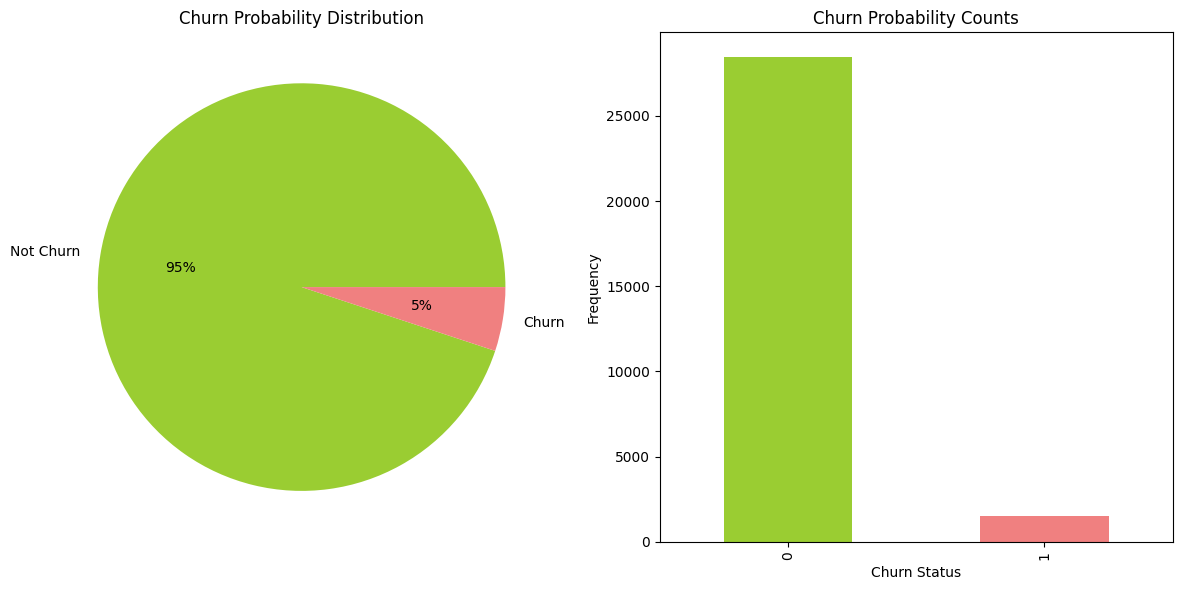

In [127]:
# Create a figure and divide it into 1 row and 2 columns (subplot)
plt.figure(figsize=(12, 6))

# Subplot 1: Pie chart to visualize churn_probability
plt.subplot(1, 2, 1)  # (rows, columns, index)
data = output.churn_probability.value_counts()
labels = ['Not Churn', 'Churn']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors=colors, autopct='%0.0f%%')
plt.title('Churn Probability Distribution')

# Subplot 2: Bar chart to visualize churn_probability counts
plt.subplot(1, 2, 2)  # (rows, columns, index)
data.plot(kind='bar', color=['yellowgreen', 'lightcoral'])
plt.title('Churn Probability Counts')
plt.xlabel('Churn Status')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show both charts side by side
plt.show()

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [135]:
output.to_csv('submission.csv',index=False)